
# Introduction to Adaptive Machine Learning

## What is Adaptive Machine Learning?
Adaptive machine learning refers to algorithms that can learn and update their model incrementally as new data becomes available. Unlike traditional batch learning, which requires the entire dataset upfront, adaptive learning is ideal for scenarios where:
- Data arrives in chunks or streams over time.
- The dataset is too large to fit into memory.
- The underlying data distribution changes (concept drift).

---

## Key Characteristics of Adaptive Learning
1. **Incremental Updates**:
   - Models update their weights or parameters without retraining from scratch.
   - Allows real-time adaptation to new patterns in data.

2. **Streaming Data Compatibility**:
   - Handles data arriving in small batches or one sample at a time.
   - Suitable for IoT, online systems, and large-scale datasets.

3. **Concept Drift Handling**:
   - Adapts to changes in the underlying data distribution (e.g., user behavior shifts).

4. **Memory and Computational Efficiency**:
   - Processes smaller chunks of data, requiring less memory and computational resources.

---

## Applications of Adaptive Machine Learning
- **Fraud Detection**:
  - Real-time updates to detect evolving fraud patterns.
- **Recommendation Systems**:
  - Adapting to user preferences over time.
- **Predictive Maintenance**:
  - Learning from continuous sensor data to predict failures.
- **Customer Churn Prediction**:
  - Adapting models to recent customer behavior to predict churn.

---

## Core Algorithms for Adaptive Learning
1. **Stochastic Gradient Descent (SGD)**:
   - Incrementally updates weights using small batches of data.
   - Supports online learning via `partial_fit`.

2. **Passive-Aggressive Algorithms**:
   - Updates aggressively when errors occur but remains passive otherwise.
   - Suitable for classification and regression.

3. **Naive Bayes**:
   - Updates probabilities incrementally for each new batch.
   - Lightweight and efficient.

4. **Decision Trees** (Adaptive Variants):
   - E.g., Hoeffding Trees designed for streaming data.

---

## Challenges in Adaptive Learning
1. **Class Imbalance**:
   - Models might struggle with under-represented classes, especially in streaming data.
   - Solutions: Sampling techniques (e.g., SMOTE, NearMiss) or class weighting.

2. **Concept Drift**:
   - The underlying data distribution may change over time.
   - Strategies:
     - Regularly retrain the model.
     - Use adaptive drift detection mechanisms.

3. **Overfitting to Recent Data**:
   - Models might overweight recent chunks, forgetting earlier patterns.
   - Solutions: Use algorithms that balance between old and new data.

---

## Comparison: Traditional Learning vs. Adaptive Learning

| **Aspect**          | **Traditional Learning**             | **Adaptive Learning**            |
|----------------------|--------------------------------|-----------------------------------|
| **Data Requirement** | Entire dataset upfront        | Incremental chunks or streams    |
| **Training**         | One-time, computationally expensive | Continuous, lightweight updates |
| **Memory Usage**     | High                         | Low                              |
| **Adaptability**     | Limited to initial data       | Continuously learns              |
| **Use Case**         | Static datasets              | Dynamic, streaming datasets      |

---

## Evaluation Metrics in Adaptive Learning
Since adaptive models learn incrementally, evaluate them at regular intervals:
1. **Accuracy**:
   - Measures overall correctness.
2. **ROC-AUC**:
   - Evaluates classification performance, especially for imbalanced datasets.
3. **F1-Score**:
   - Useful for datasets with skewed class distributions.

---



#Credit Card Fraud System

Credit Card Fraud is a common form of theft in the finance sector. Unauthorized and suspicious transaction on bank statements have been an rising issue and these frauds constitute a significant part of the fiscal loss in the banking sector. Detecting a credit card fraud in real time is an uphill task primarily because of the fact that fraud transactions are very few in amount in comparison to the normal transactions. This Notebook follows all basic steps of a Machine Learning Classification lifecycle, and can be used as reference for the few steps involved in construction of a ML pipeline: <br>
1. Loading Data
2. Exploratory Data Analysis: Correlations, Distributions, Outlier detection
3. Feature Scaling: Standard Scaler
4. Data Segmentation
5. Safe Sampling to mitigate class imbalance: Near Miss and SMOTE
6. Model Training: using Adaptive machine learning models.
7. Predictions and Evaluation
8. Model Explanation

**Objective:** Detecting as many frauds possible and at same time minimizing the number of Non- Frauds categorized as Frauds in the process. <br>
**Challenges:** Class Imbalance, No description available about the features <br>

### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from lightgbm import record_evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
import joblib
import pickle
import json

import random

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Loading Data

In [2]:
ccfr= pd.read_csv('/content/creditcard.csv')
ccfr.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/creditcard.csv'

In [ ]:
# Separate fraudulent and non-fraudulent transactions
fraud_df= ccfr[ccfr['Class']==1]
nonfraud_df= ccfr[ccfr['Class']==0]

# Count the number of fraudulent and non-fraudulent transactions
fraudcount= fraud_df.count()[0]
nonfraudcount= nonfraud_df.count()[0]

print ("Frauds=",fraudcount)
print ("Non Frauds=",nonfraudcount)

print (ccfr.shape)

### EDA

Describing the dataframe, we can see that all features are numeric but are not standardised. Hence we will standardise them using a Scaler in further steps.

In [ ]:
ccfr.describe()

There are no missing values in our data:

In [ ]:
ccfr.isna().sum()

Plotting the correlation heatmap shows that the independent features don't possess significant inter feature correlation. Hence, all of them can be a feature in our model as they are independent of each other. The pearson correlation indices tell us that the independent variables don't show significant linear relationship with the target variable. Note that the correlation coefficient is a way to represent linear relationships.

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(ccfr.corr(),cmap="coolwarm", annot=True)
plt.show()

Let's use seaborn distplot to see the distribution of each feature with respect to the target variable 'Class'. The distplots give us a visual presentation of how a particular feature's values can tell apart among Fraud and Non-fraud cases. The plots showing a clear divide can be considered as significant features that may have good impact on our target variable.

In [ ]:
for c in ccfr.columns[0:30]:
    print ("******************** COLUMN ",c," ***********************")
    col= ccfr[c]
    col=np.array(col)
    col_mean= np.mean(col)
    col_median= np.median(col)
    col_std= np.std(col)
    col_var= np.var(col)
    col_range= col.max()-col.min()
    fig=sns.FacetGrid(ccfr,hue="Class",height=5,aspect=2,palette=["blue", "green"])
    fig.map(sns.distplot,c)
    fig.add_legend(labels=['Non Fraud','Fraud'])
    plt.axvline(col_mean,color='red',label='mean')
    plt.axvline(col_median,color='yellow',label='median')
    plt.legend()
    plt.show()

In [ ]:
ccfr.columns

There are plenty outliers in each feature. However, it is better not removing them as the minority class already has only few samples and there is good chance that these outliers impart some meaning to the problem:

In [ ]:
for feature in ccfr.drop('Class', axis= 1).columns:
    sns.boxplot(x='Class', y= feature, data= ccfr)
    plt.show()

In [ ]:
for feature in ccfr.drop('Class', axis= 1).columns:
    sns.boxplot(x='Class', y= feature, data= ccfr)
    plt.show()

### Feature Scaling

Using Sci-kit Learn's Standard Scaler

In [ ]:
X = ccfr.drop('Class', axis= 1)
y = ccfr['Class']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(scaled_features, columns= X.columns)

In [ ]:
X_scaled.head()

The features are now standardised and fit for modelling as all of them have mean almost equal to zero and standard deviation nearly equal to 1:

In [ ]:
X_scaled.describe()

In [ ]:
ccfr_scaled = pd.concat([X_scaled, y], axis= 1)

### Data Segmentation

Train test split. Train set can be used for sampling purposes. The test set is kept aside for "real world" testing.

In [ ]:
X = ccfr_scaled.drop('Class', axis= 1)
y = ccfr_scaled['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.13, random_state= 48)

In [ ]:
X_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

### Sampling to deal with class imbalance

1. Undersampling the majority class using Near Miss strategy to get the samples from majority class that are nearest to the minority class records in terms of distance. The overall idea is to reduce information loss with undersampling. If our classifier trains on the samples closest to the decision boundary then it will be able to classify points that are farther apart.
2. Oversampling the minority class using SMOTE strategy that is common over sampling used in many class imbalance problems.
3. Aim is to sample to an extent without introducing many systhetic samples of the minority class nor losing out on significant majority class samples. The remaining imbalance can be handled by using class weights in our model parameters when and where required.

In [ ]:
train = pd.concat([X_train, y_train], axis =1)

In [ ]:
under_sampler = NearMiss(sampling_strategy= {0:100000, 1:410})
#under sampling the majority to 80000 records keeping minority as it is
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [ ]:
over_sampler = SMOTE(sampling_strategy= {0:100000, 1:10000}, random_state= 48)
#over sampling minority class to 20000 records
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

In [ ]:
train_sampled = pd.concat([X_train, y_train], axis= 1)
#it is good practice to shuffle the training set
train_sampled = train_sampled.sample(frac=1).reset_index(drop= True)
X_train = train_sampled.drop('Class', axis= 1)
y_train = train_sampled['Class']

In [ ]:
X_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
X_test.shape

In [ ]:
y_test.value_counts()

**Post Sampling**<br>
Train Set: (110000, 30) -- 100000 Non Frauds, 10000 Frauds <br>
Test Set: (37025, 30) -- 36943 Non Frauds, 82 Frauds

### Model Training and Evaluation
The motive of our classifier will be to predict maximum of the fraud transactions as fraud at the cost of some non fraud transactions being predicted as fraud. But we must not lose out on the fraud transactions! Hence we will aim for High recall on the frauds (that is the percentage of frauds correctly classified as frauds) but a low precision on the frauds is manageable. Thus, a good overall ROC Score and good recall score for the minority class will be apt.

**SGD Clasifier**

SGD Classifier comes with set of hyperparameters that can be set accordingly to train a model similar to the working linear models like Logistic regression or SVMs while minimizing the loss using Stochastic Gradient Descent. SGD Classifier models do good on large sized data.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights manually
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

In [ ]:
# Initialize the SGDClassifier with class weights
sgd_model = SGDClassifier(learning_rate='adaptive', eta0=0.001, max_iter=1, warm_start=True,
                          class_weight=class_weight_dict)

In [ ]:
# Adaptive online learning with partial_fit
for epoch in range(10):  # Simulate multiple passes over the data
    for i in range(0, len(X_train), 100):  # Process data in chunks of 100 samples
        X_chunk = X_train[i:i+100]
        y_chunk = y_train[i:i+100]
        sgd_model.partial_fit(X_chunk, y_chunk, classes=classes)

In [ ]:
# Evaluate the model
pred = sgd_model.predict(X_test)
print("ROC AUC Score =", roc_auc_score(y_test, pred))
print("Classification Report:")
print(classification_report(y_test, pred))

Another Adaptive Machine learning model

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

# Initialize the Passive-Aggressive Classifier
pa_model = PassiveAggressiveClassifier(max_iter=1, warm_start=True, class_weight=class_weight_dict, random_state=42)

# Adaptive online learning with partial_fit
classes = np.unique(y_train)  # Ensure the unique classes are specified
for epoch in range(10):  # Simulate multiple passes over the data
    for i in range(0, len(X_train), 100):  # Process data in chunks of 100 samples
        X_chunk = X_train[i:i+100]
        y_chunk = y_train[i:i+100]
        pa_model.partial_fit(X_chunk, y_chunk, classes=classes)

# Evaluate the model
pred = pa_model.predict(X_test)
print("ROC AUC Score =", roc_auc_score(y_test, pred))
print("Classification Report:")
print(classification_report(y_test, pred))


#Lab Task
##Instructions:
###Dataset Preparation:

Use the Telco Customer Churn dataset from Kaggle "https://www.kaggle.com/datasets/blastchar/telco-customer-churn".

Focus on the target variable Churn (Yes/No). Convert it to binary (1 for Yes, 0 for No).
* Preprocess the dataset
* Model Implementation:

###Select a adaptive machine learning model
* Simulate a streaming scenario:
* Split the data into chunks (e.g., 500 samples per chunk).
* Train the model incrementally using partial_fit.
* Evaluation:

Track model performance after processing each chunk:
Accuracy
ROC-AUC Score
Visualize performance metrics over the chunks.

###Bonus:

* Use a sampling technique like NearMiss to handle class imbalance if observed.
* Try two models and compare their performances.

# Telco Customer Churn Prediction

![image](https://miro.medium.com/v2/resize:fit:1358/1*iJUr0X5H_rZz6WGa1Gv35A.jpeg)

## Dataset Preparation

- Dataset: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)
- Target Variable: `Churn` (Converted to binary: 1 for "Yes", 0 for "No")

# Key Features of the Telco Customer Churn Dataset

## Churn
Indicates whether the customer left the service in the last month.  
**Values**:  
- "Yes" (Customer churned)  
- "No" (Customer retained)

---

## Services Subscribed
Details about the services the customer has subscribed to:  
- **Phone Service**: Indicates if the customer has phone service.  
- **Multiple Lines**: Specifies whether the customer has single or multiple phone lines.  
- **Internet Service**: Type of internet service used (e.g., DSL, Fiber Optic, or None).  
- **Online Security / Online Backup**: Whether the customer has subscribed to these services.  
- **Device Protection / Tech Support**: Availability of device protection and technical support.  
- **Streaming TV / Streaming Movies**: Indicates if the customer has streaming TV or movie subscriptions.  

---

## Account Information
Details related to the customer's account and billing:  
- **Tenure**: Number of months the customer has been with the service provider.  
- **Contract**: Type of contract the customer has:  
  - Month-to-month  
  - One-year  
  - Two-year  
- **Payment Method**: Mode of payment (e.g., Credit Card, Electronic Check).  
- **Paperless Billing**: Whether the customer opted for paperless billing or not.  
- **Monthly Charges**: The amount billed to the customer monthly.  
- **Total Charges**: Total amount billed to the customer over the duration of the service.  

---

## Demographics
Customer demographic details:  
- **Gender**: Indicates whether the customer is male or female.  
- **Partner**: Whether the customer has a partner.  
- **Dependents**: Indicates if the customer has dependents (e.g., children).  


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Converting the 'TotalCharges' column to numeric data type
# Any errors during conversion (e.g., non-numeric values) will be set to NaN.
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#Checking for duplicate values
df['customerID'].duplicated().sum()

0

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Drop customer ID (irrelevant for modeling)
df.drop("customerID", axis=1, inplace=True)

In [14]:
 # Convert target variable to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [17]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<ipython-input-18-09b53b992b2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


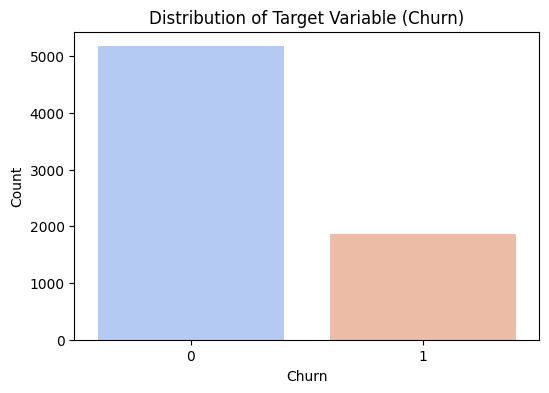

In [18]:
import seaborn as sns
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

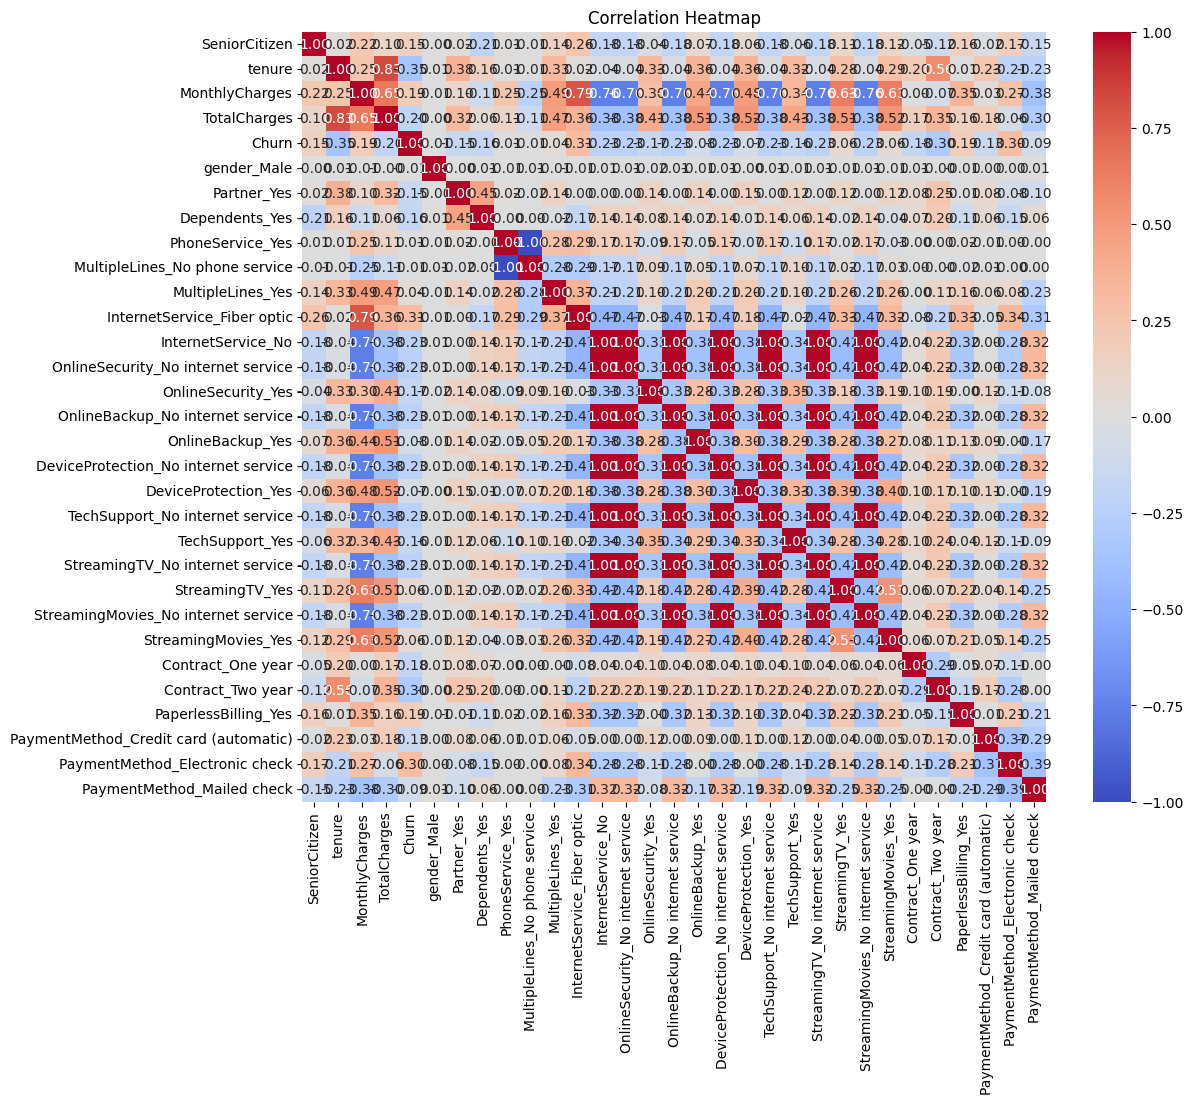

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,-0.000080,0.317504,0.062078,0.113214,-0.113214,...,-0.375223,0.514973,-0.375223,0.520122,0.170814,0.354481,0.158574,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062078,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113214,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113214,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


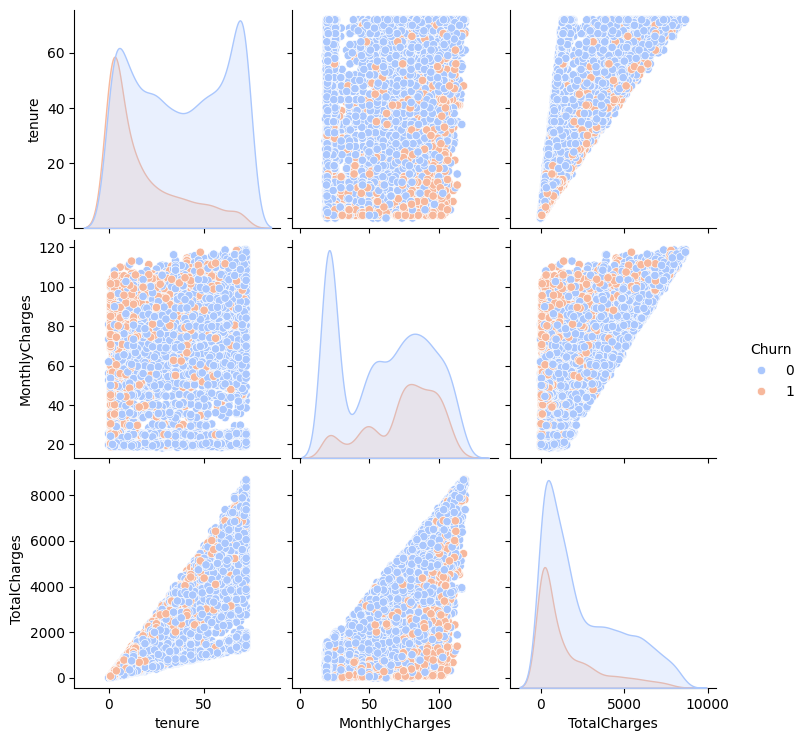

In [21]:
# Pairplot for key features
key_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[key_features], hue='Churn', palette='coolwarm')
plt.show()

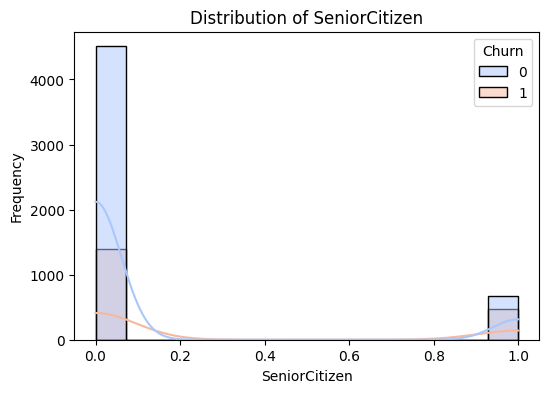

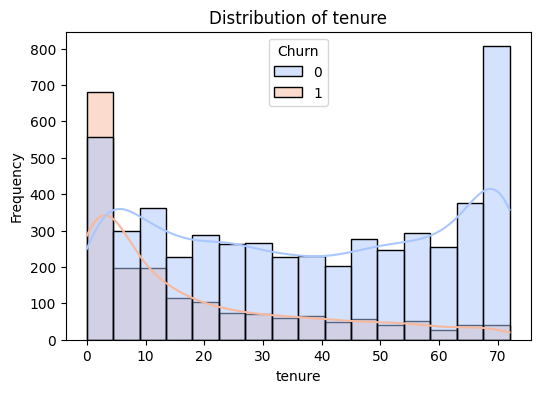

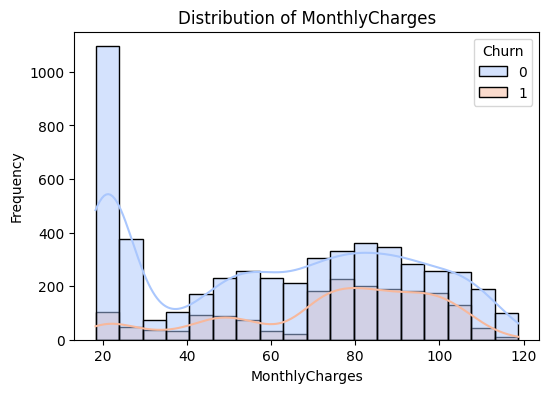

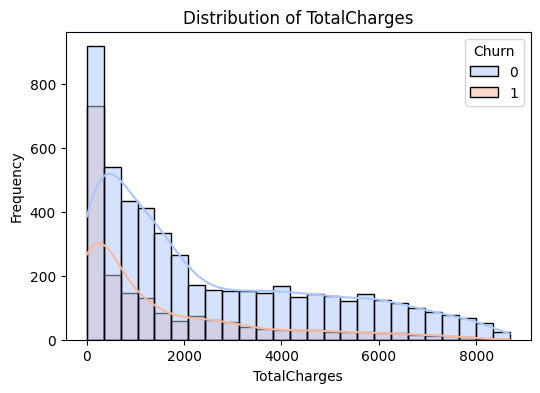

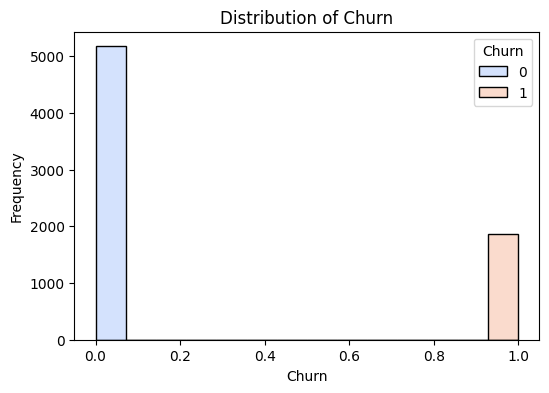

In [22]:
# Distribution plots for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    # Pass the entire DataFrame to histplot and specify 'x' and 'hue'
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-23-cda69f027378>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


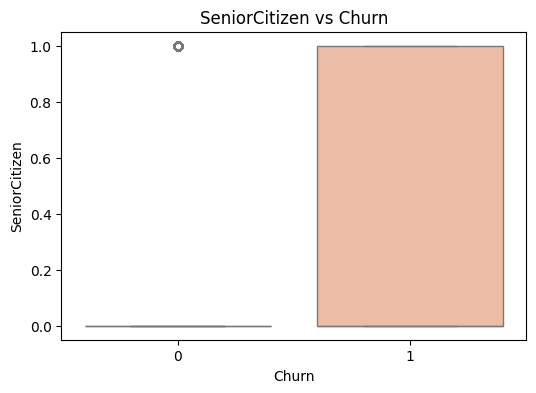

<ipython-input-23-cda69f027378>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


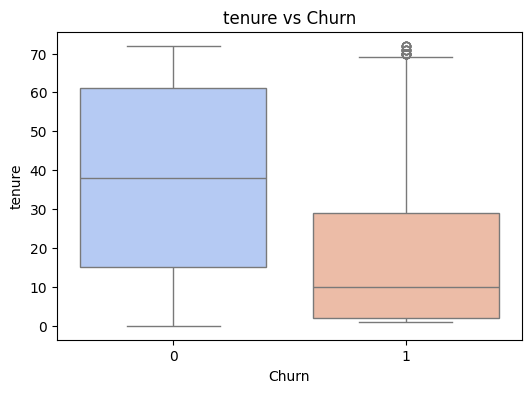

<ipython-input-23-cda69f027378>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


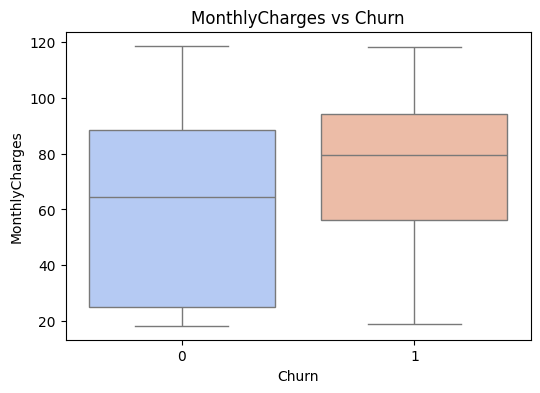

<ipython-input-23-cda69f027378>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


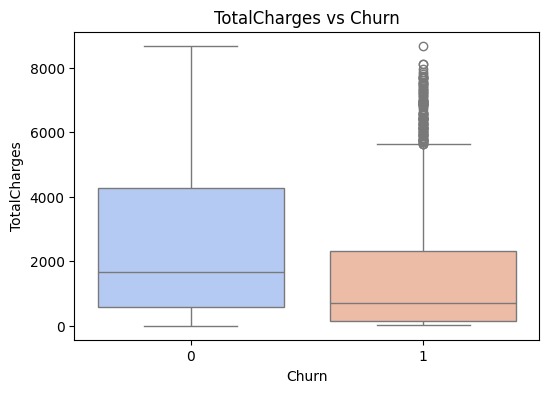

<ipython-input-23-cda69f027378>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')


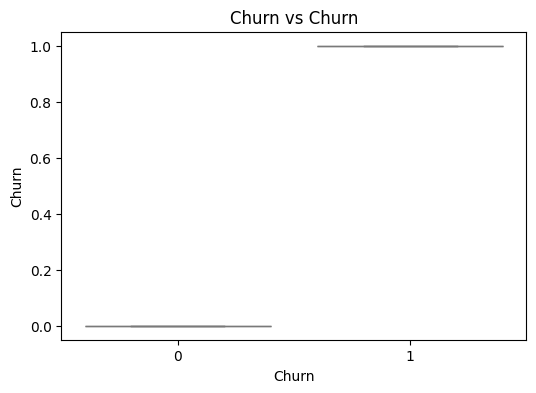

In [23]:
# Boxplots for numerical features vs Churn
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [24]:
# Prepare features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


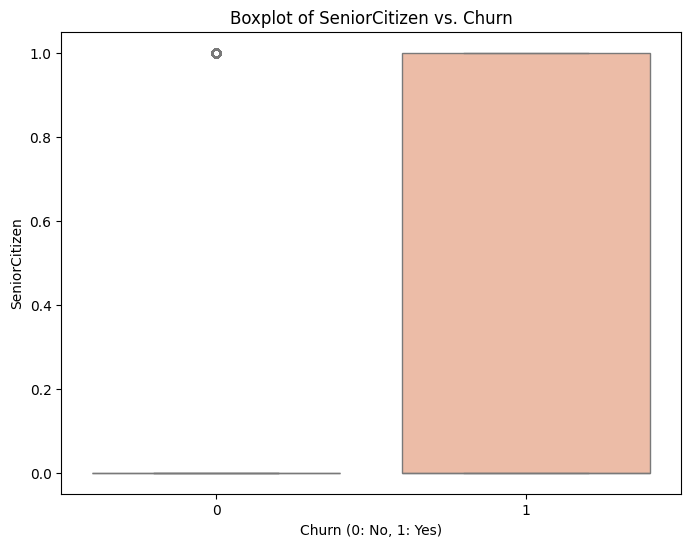

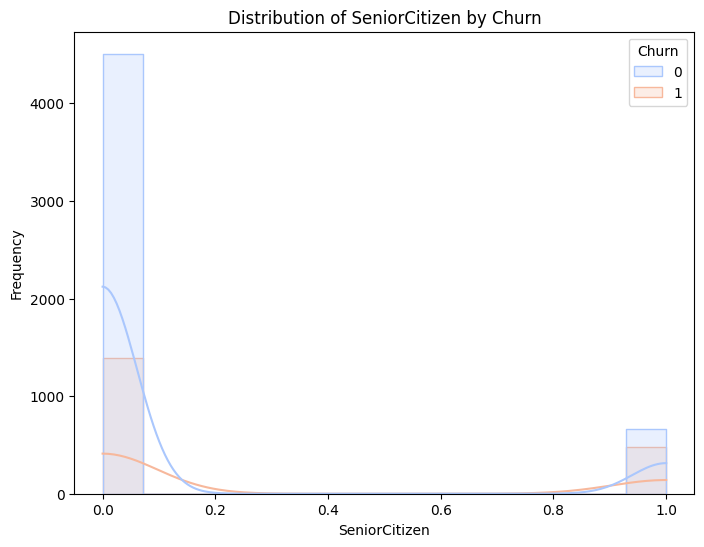

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


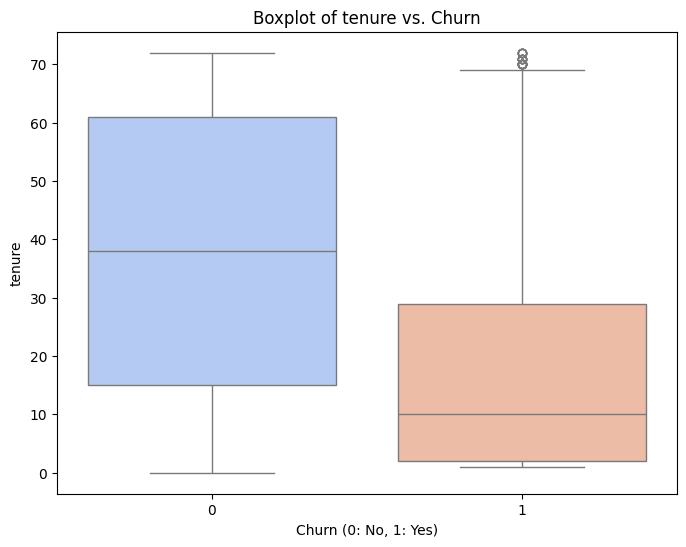

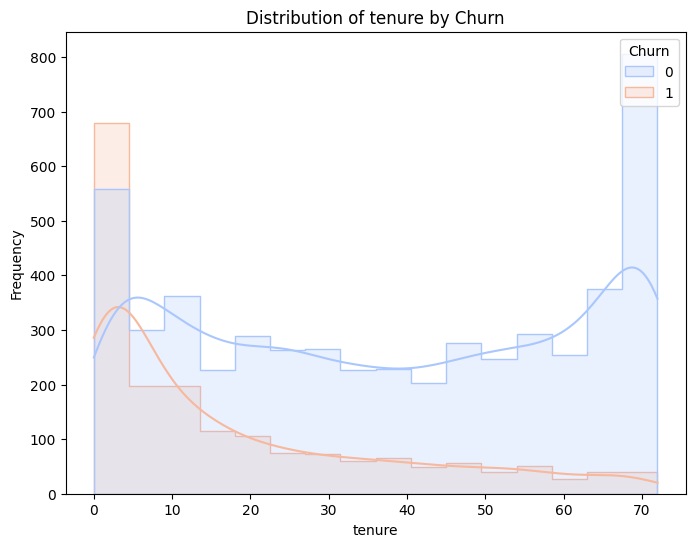

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


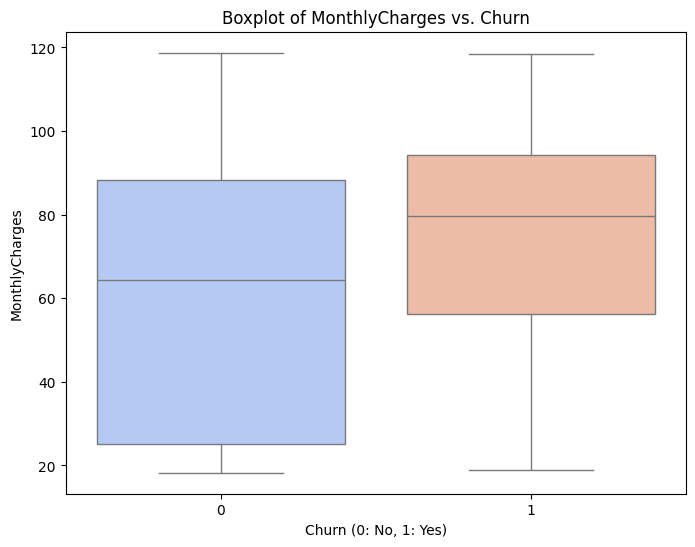

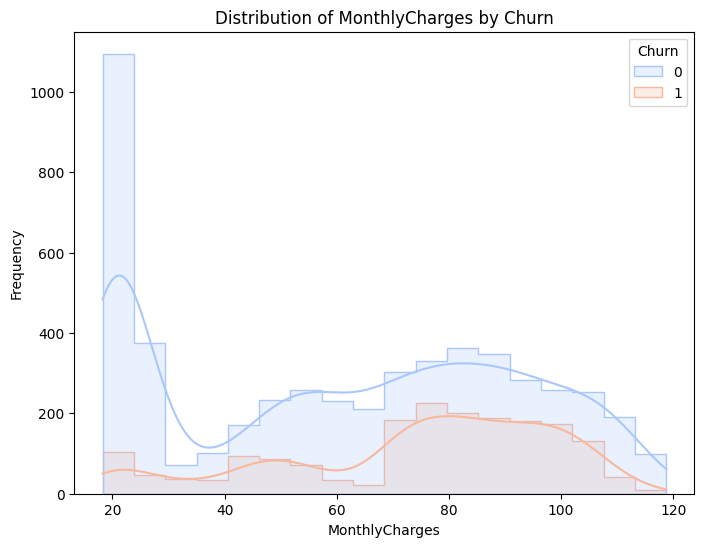

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


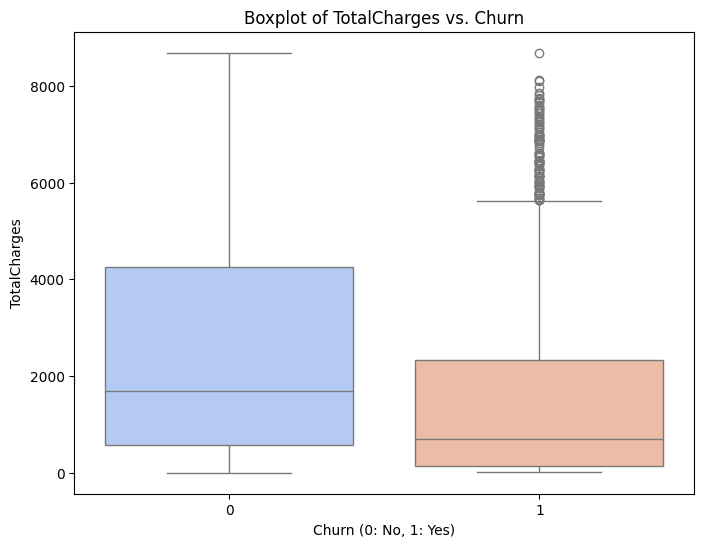

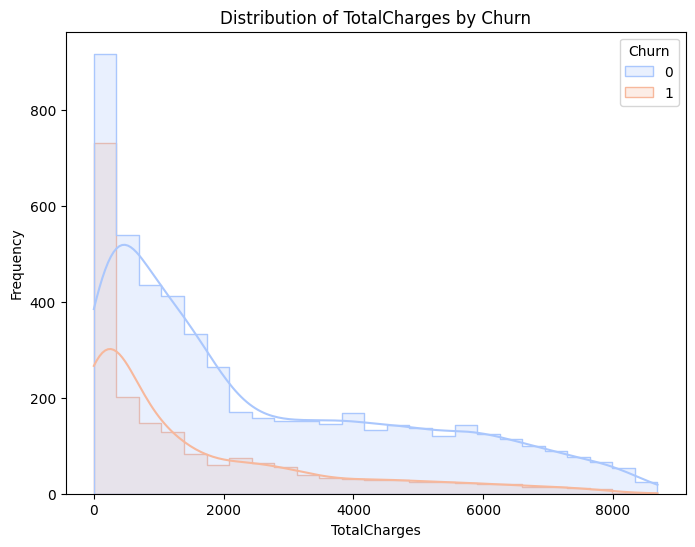

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


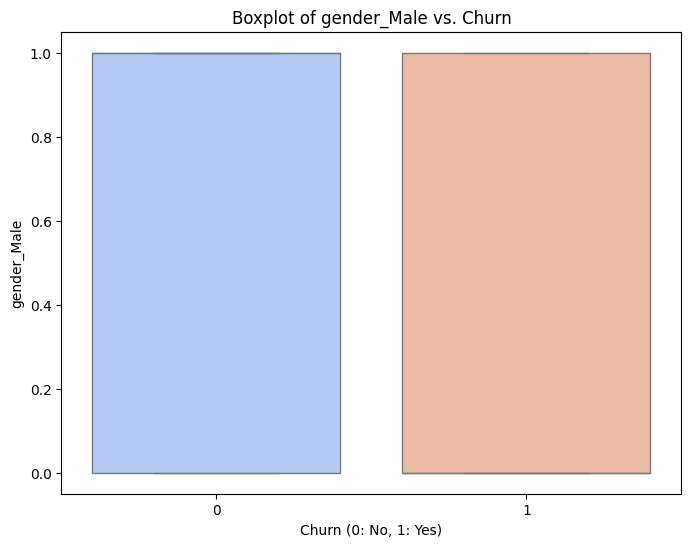

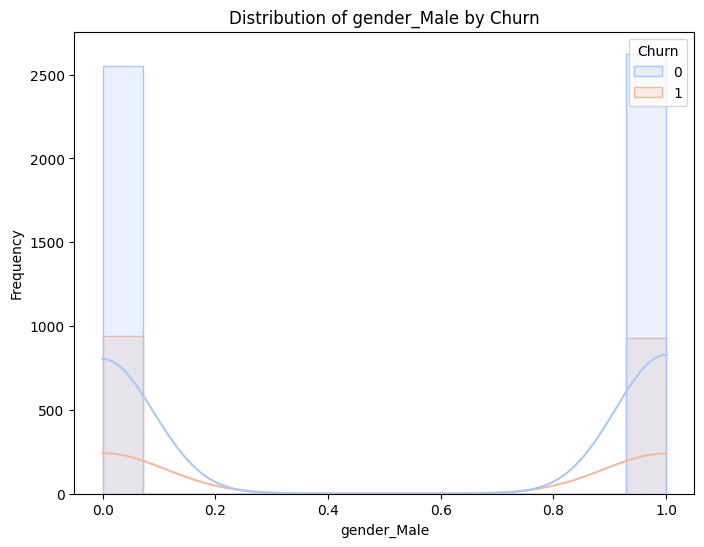

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


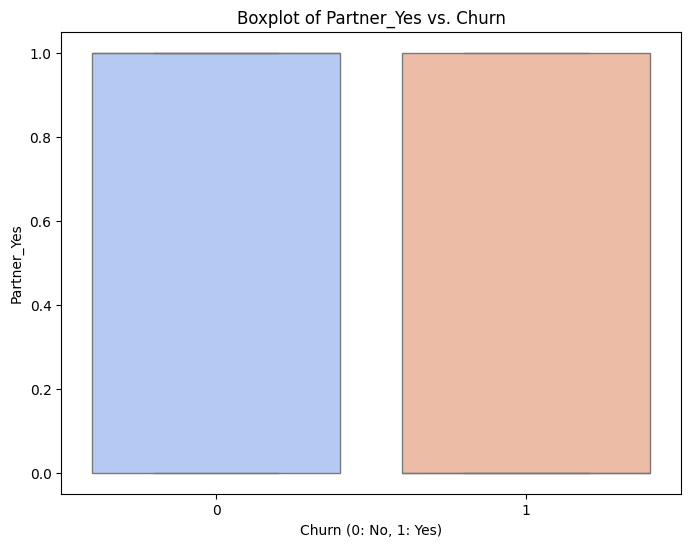

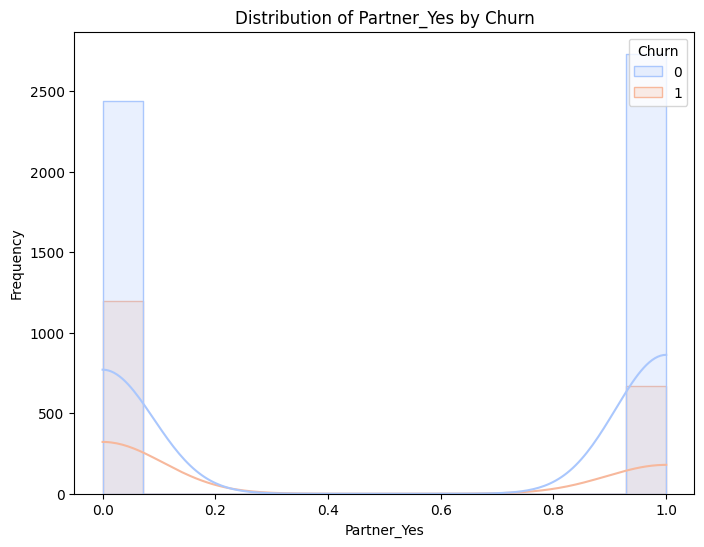

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


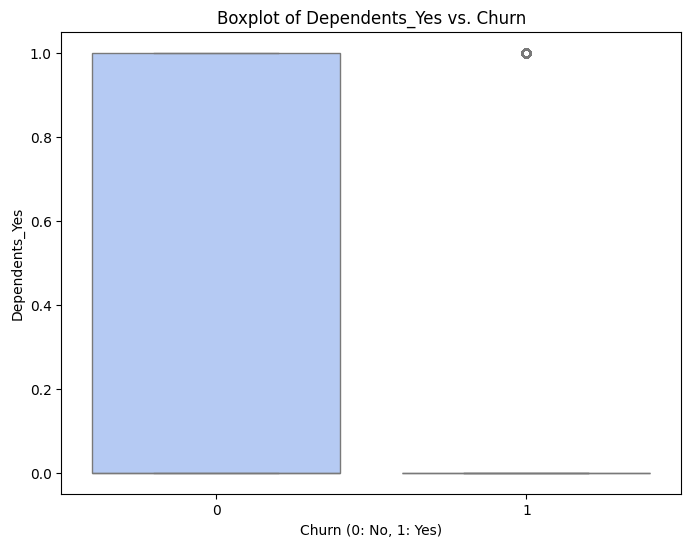

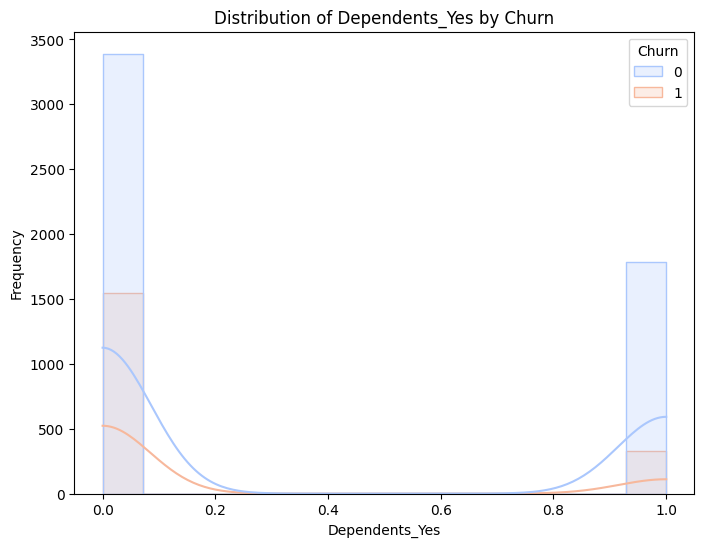

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


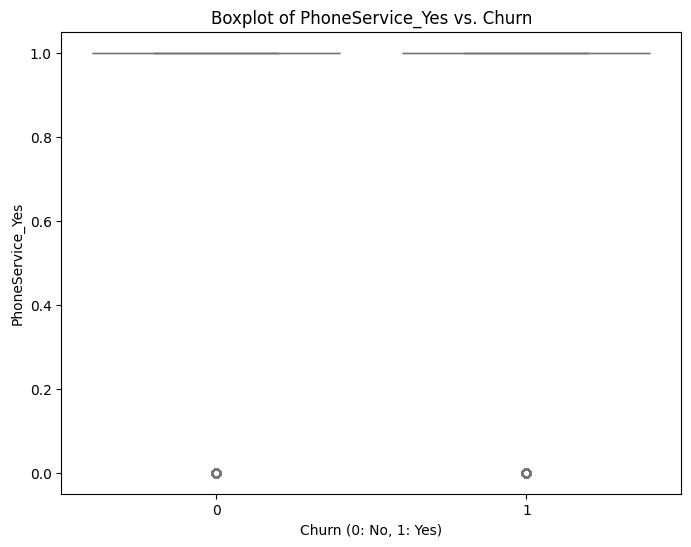

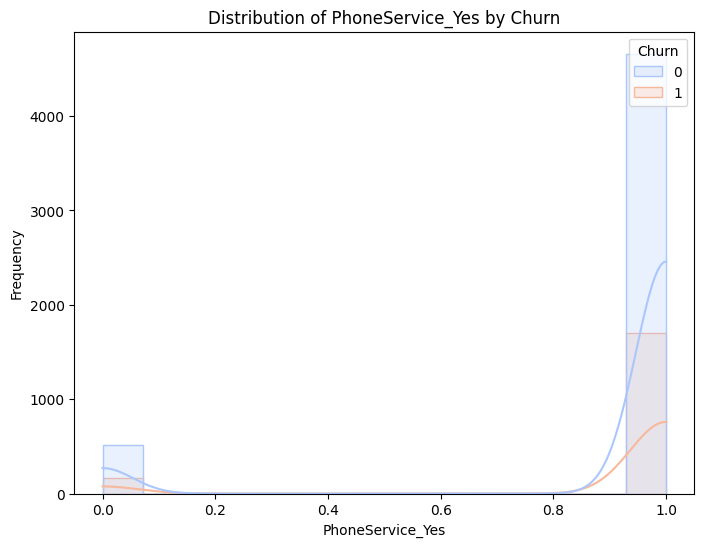

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


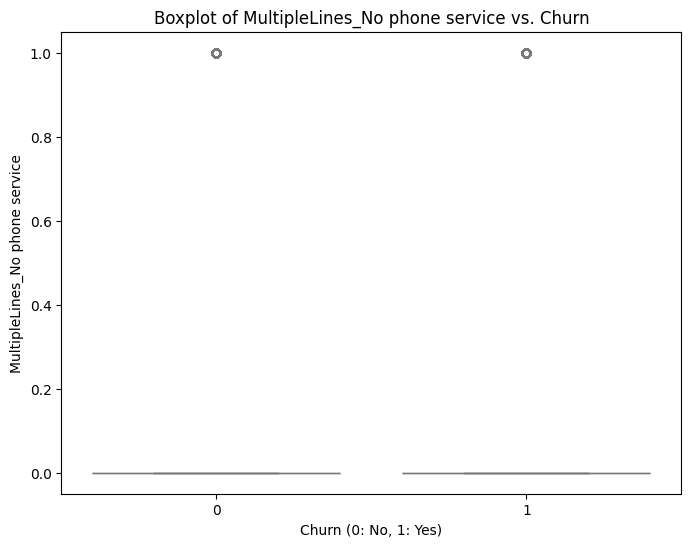

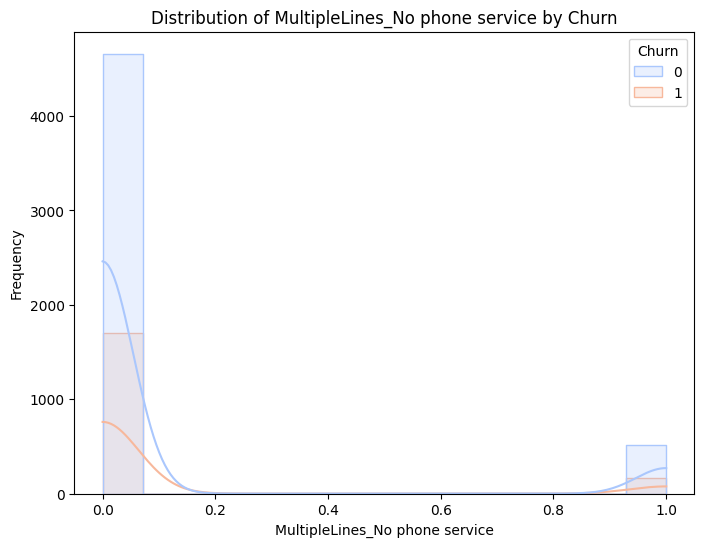

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


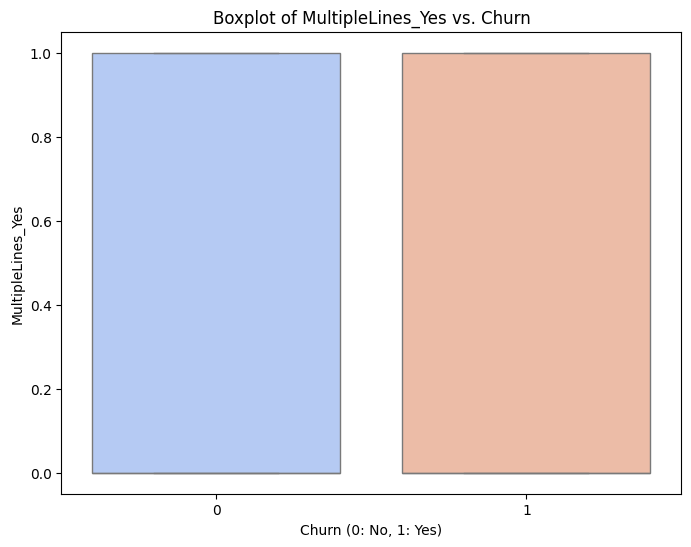

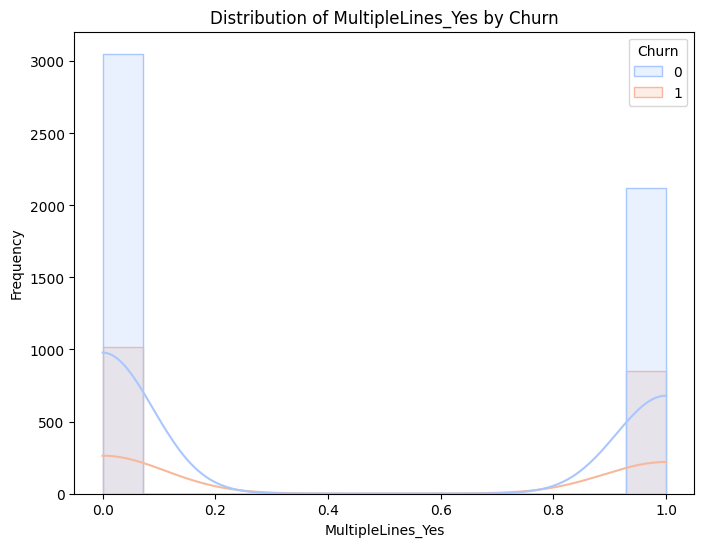

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


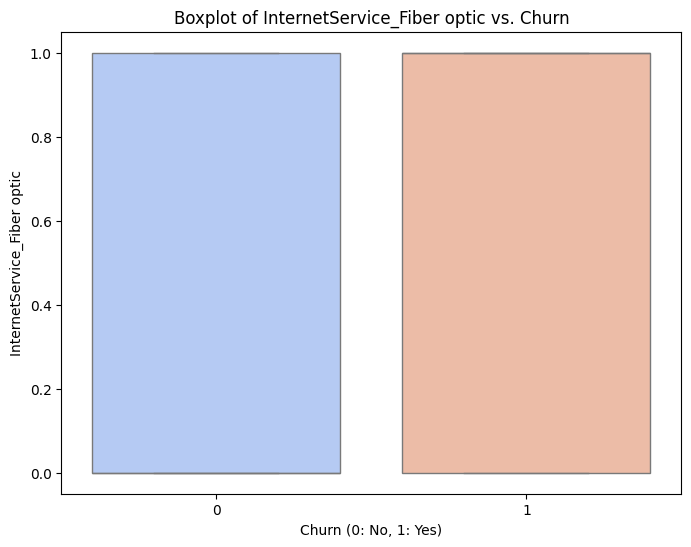

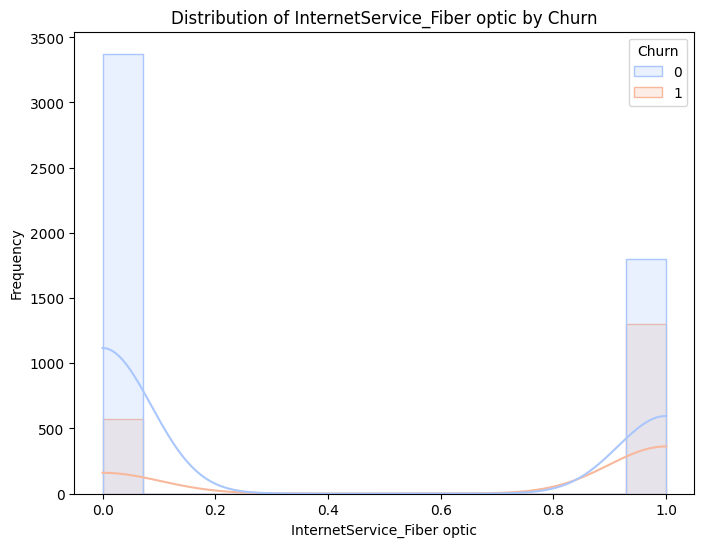

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


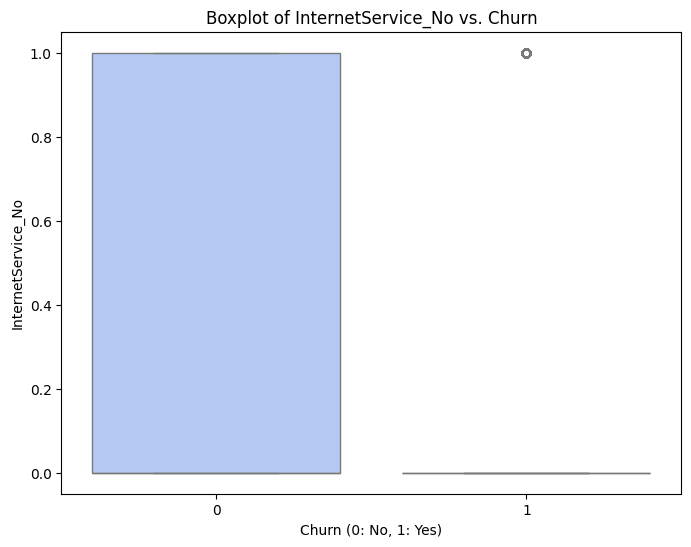

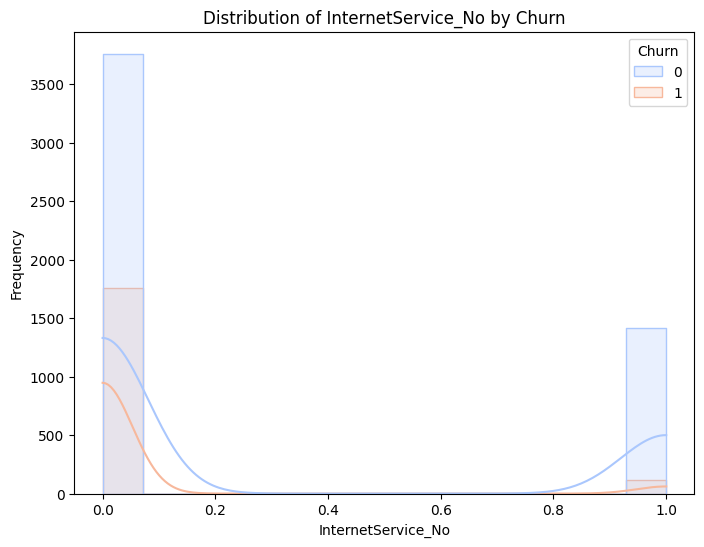

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


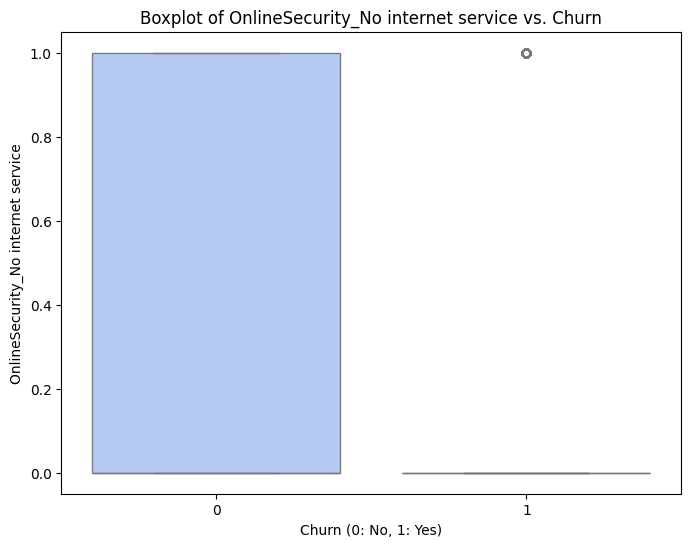

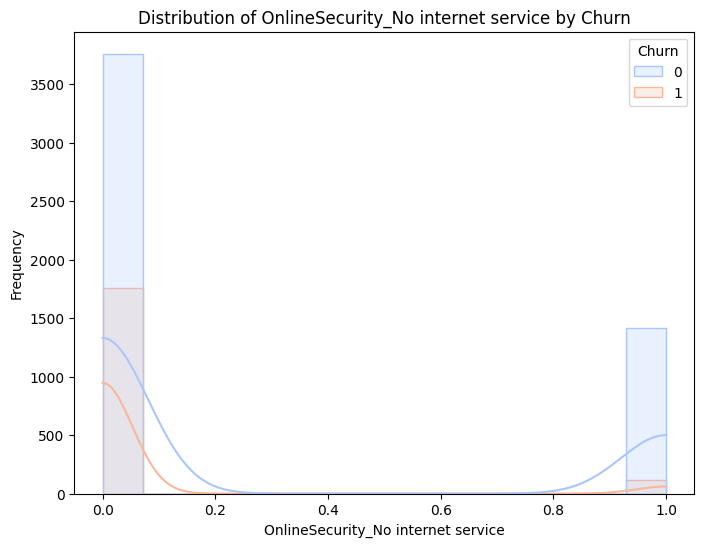

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


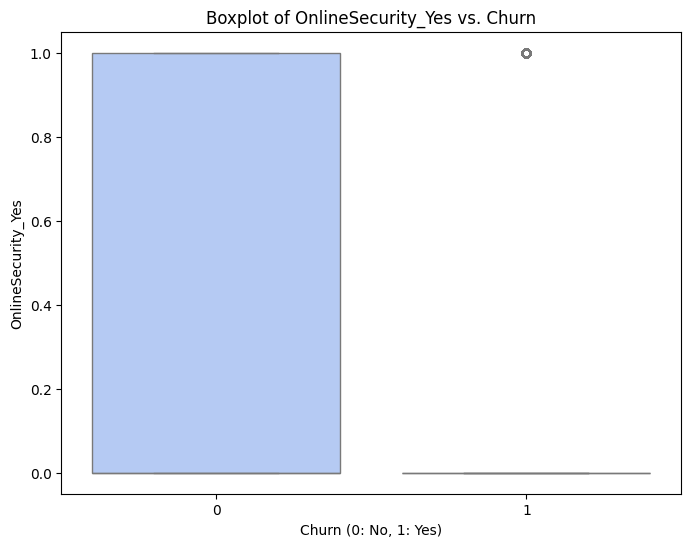

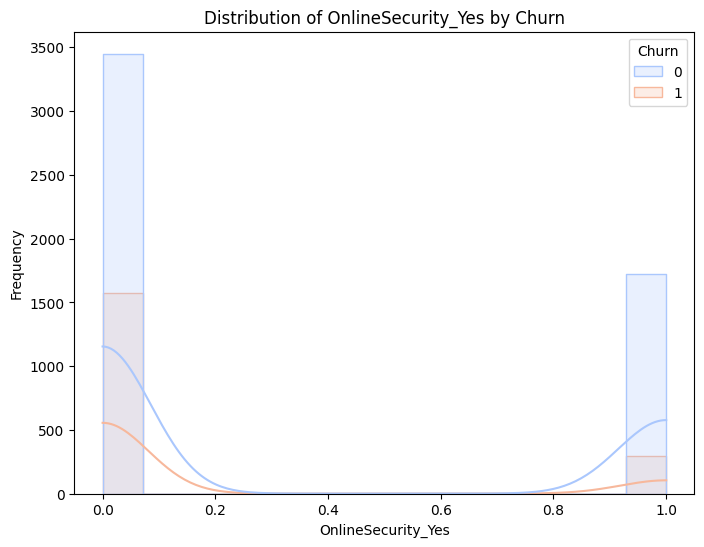

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


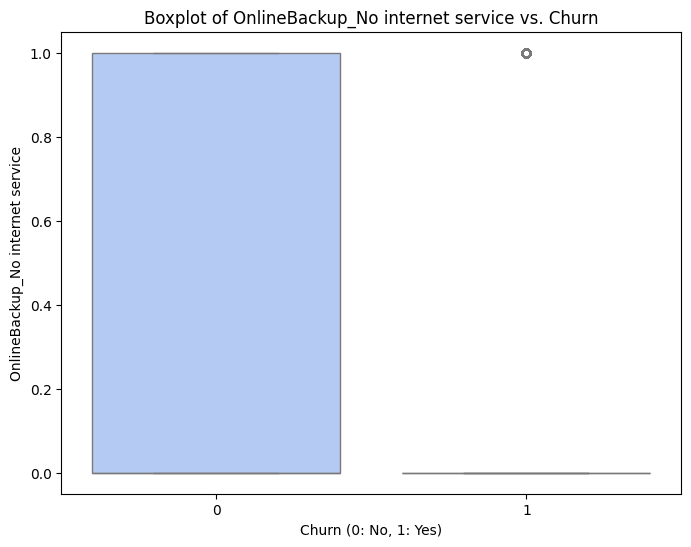

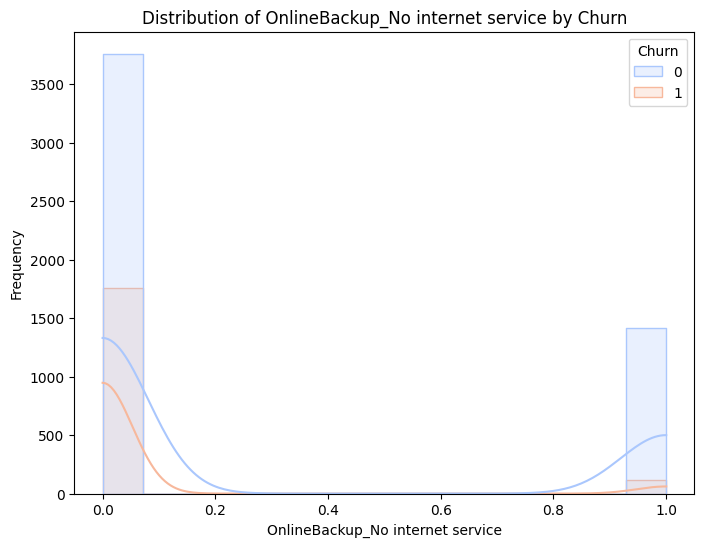

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


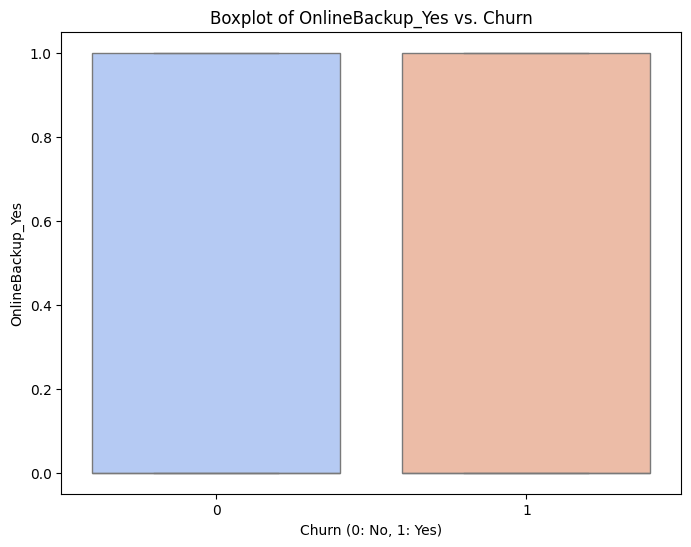

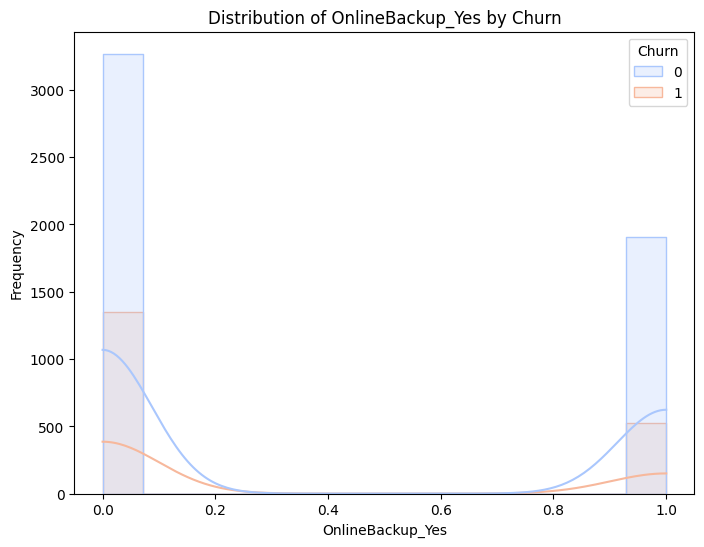

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


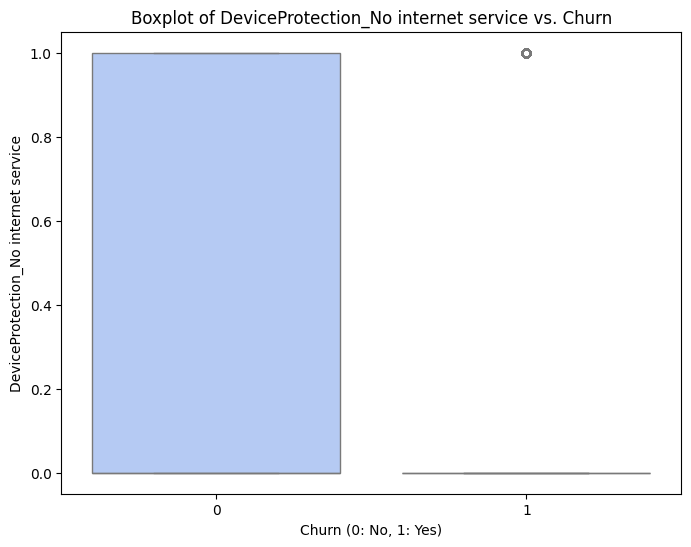

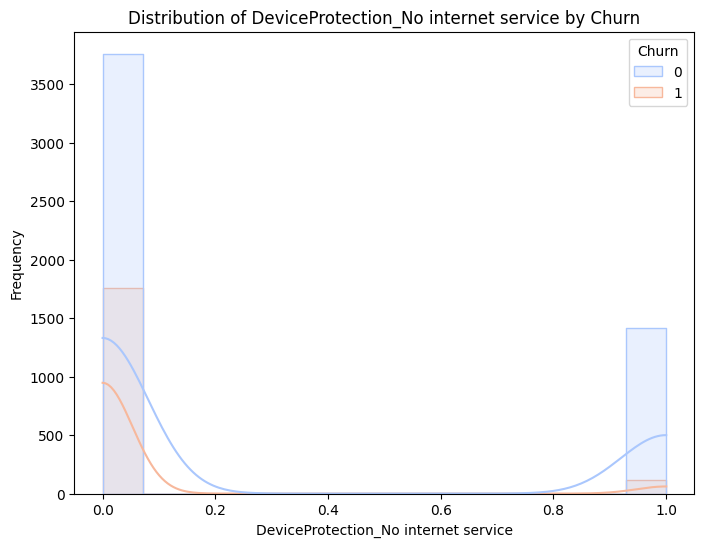

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


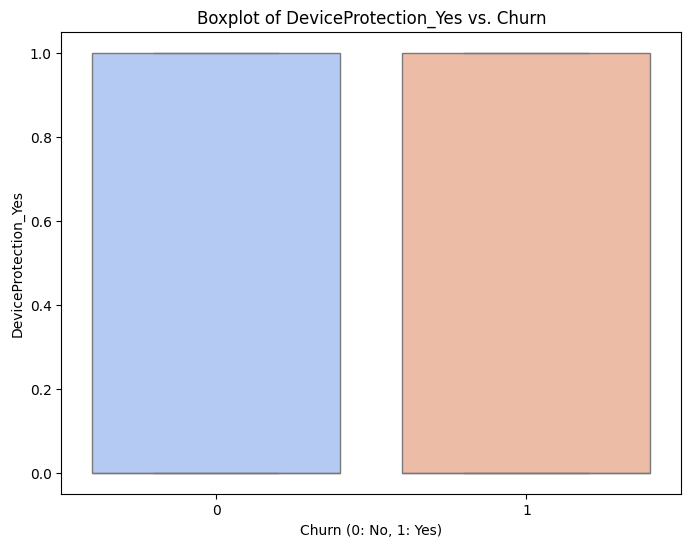

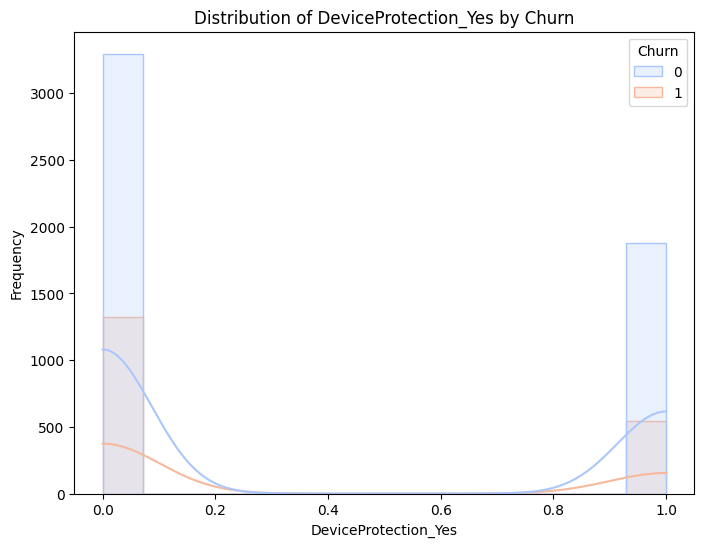

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


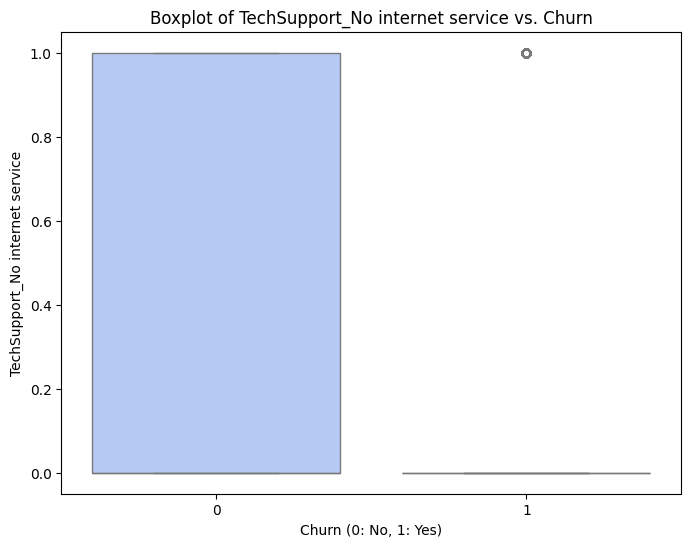

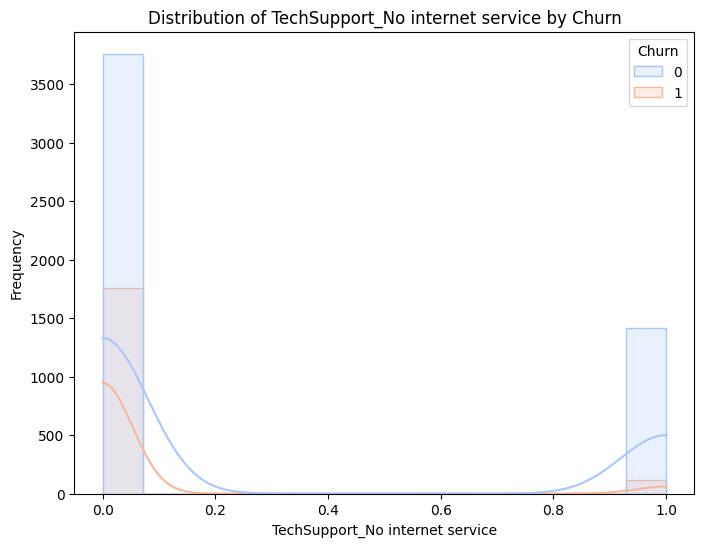

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


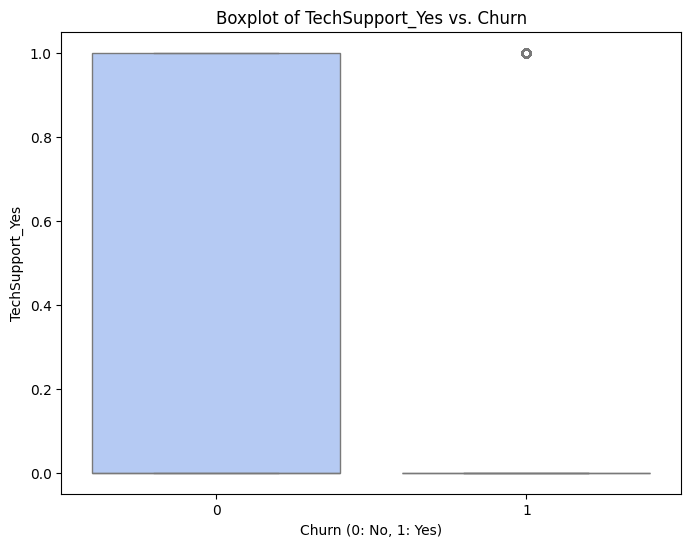

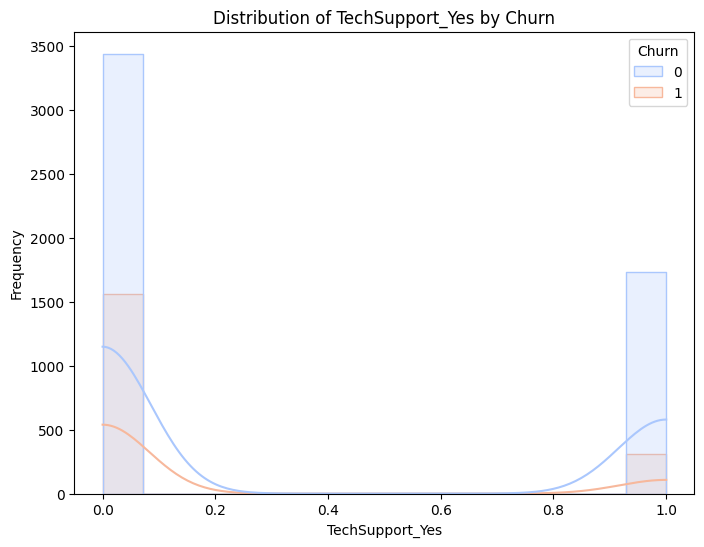

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


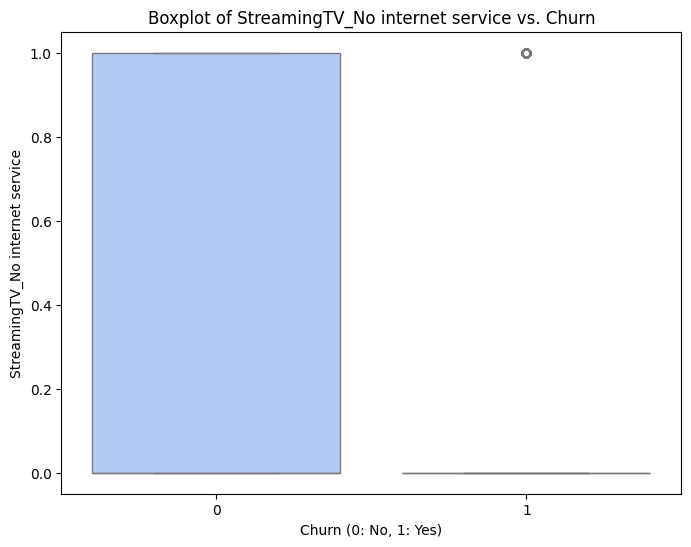

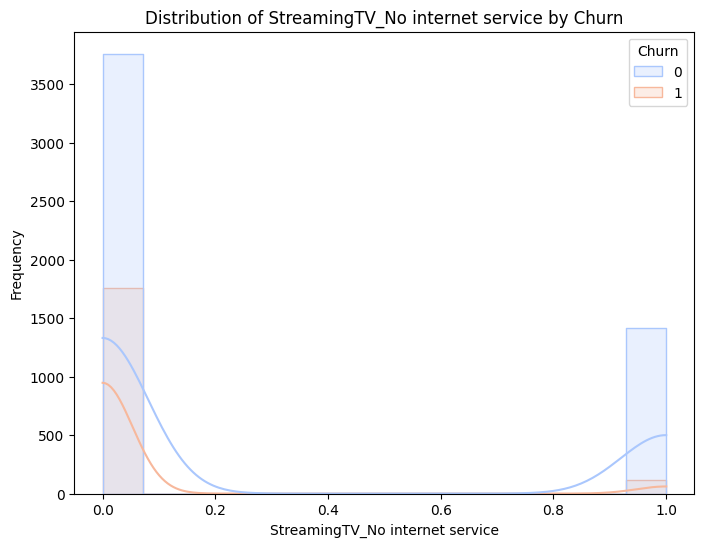

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


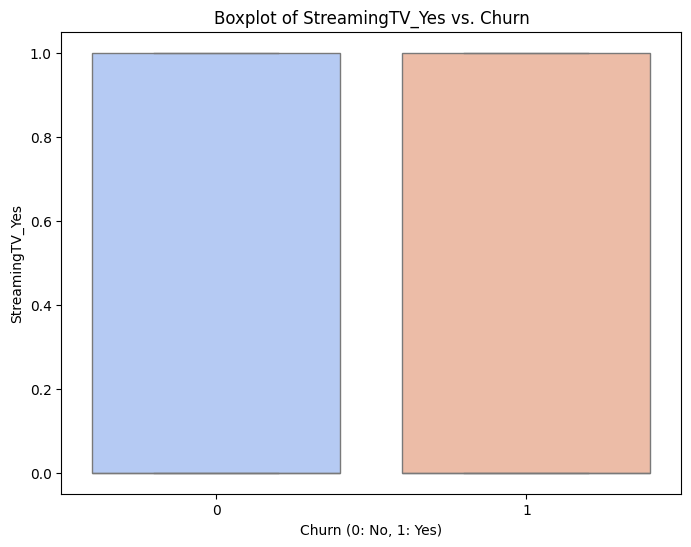

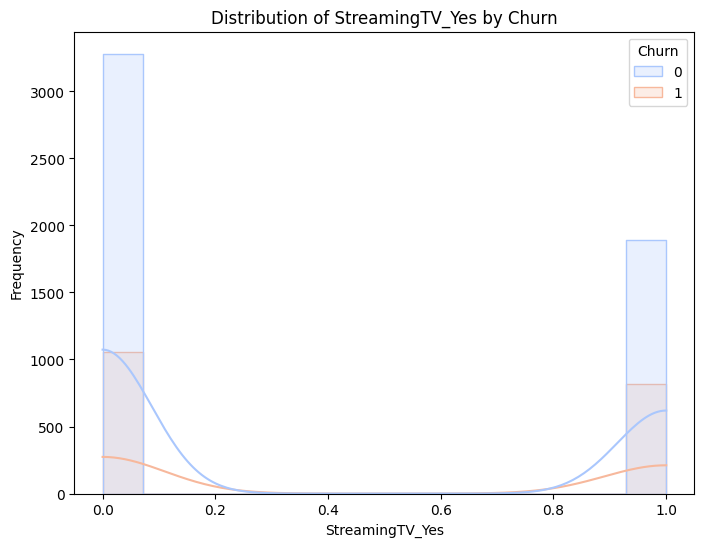

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


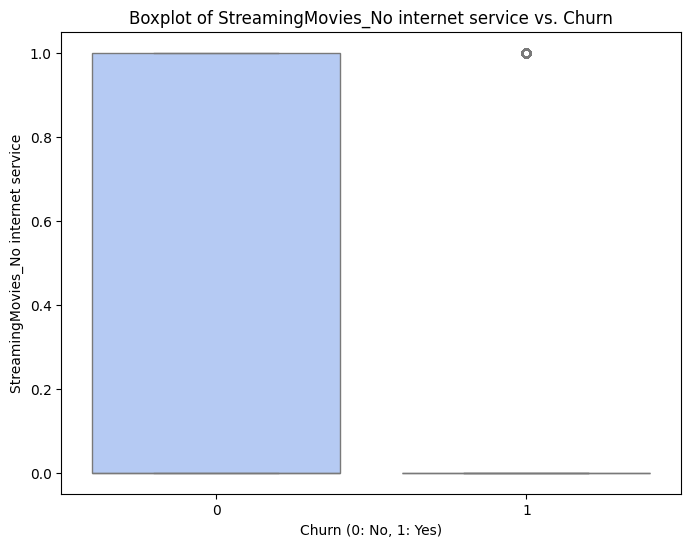

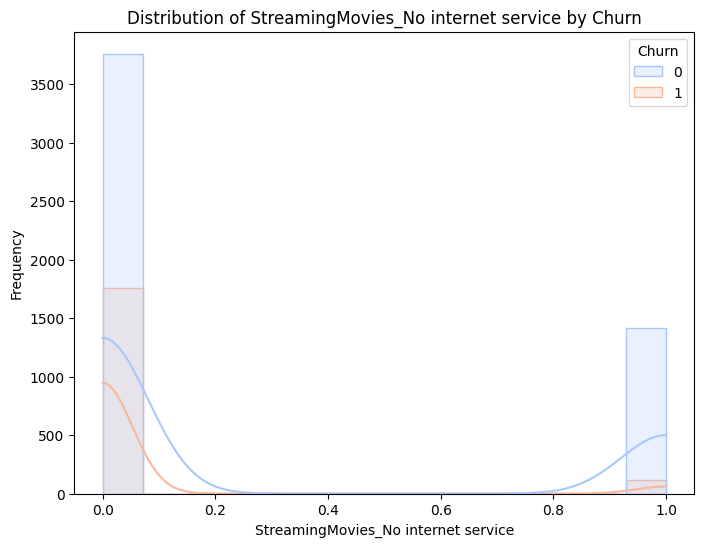

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


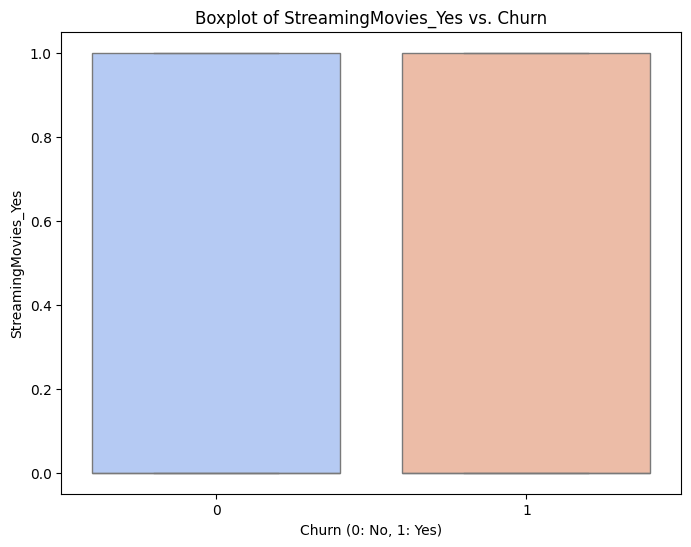

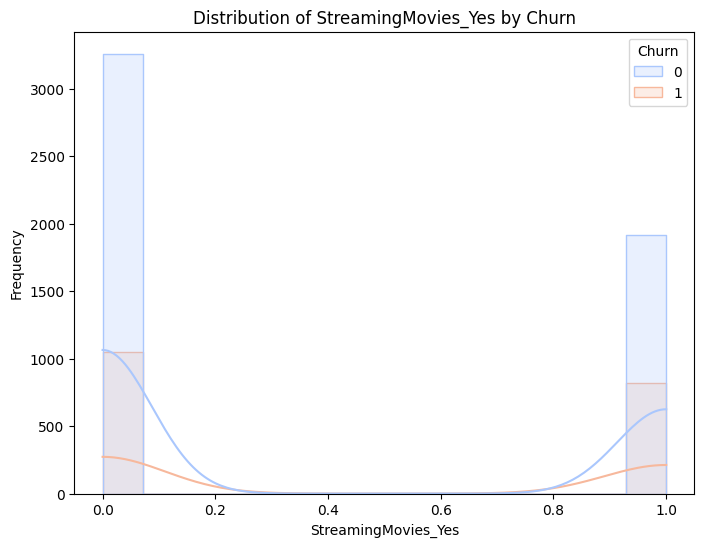

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


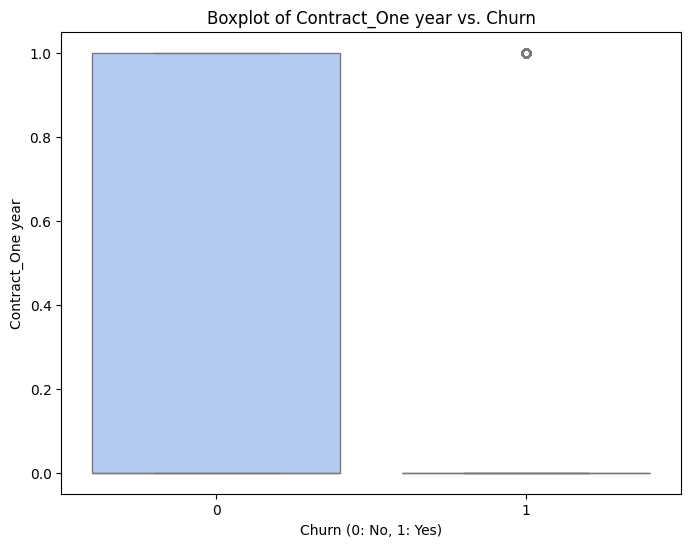

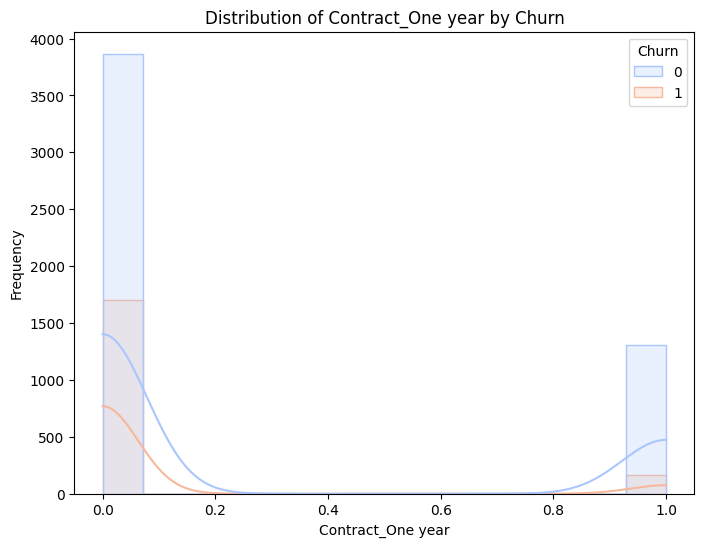

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


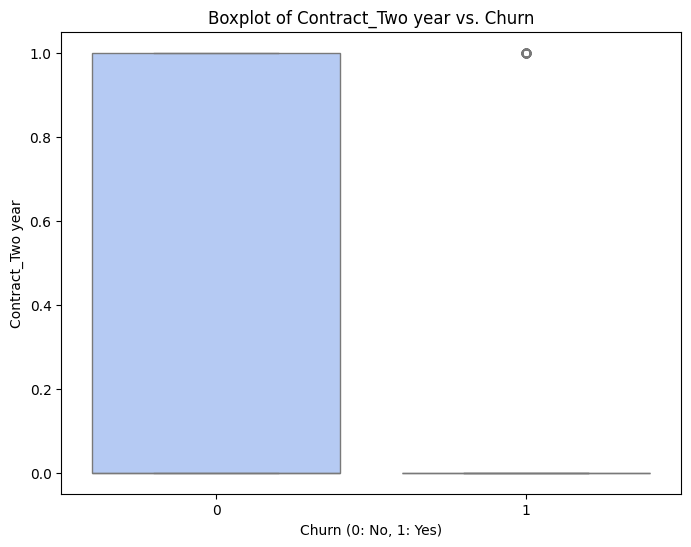

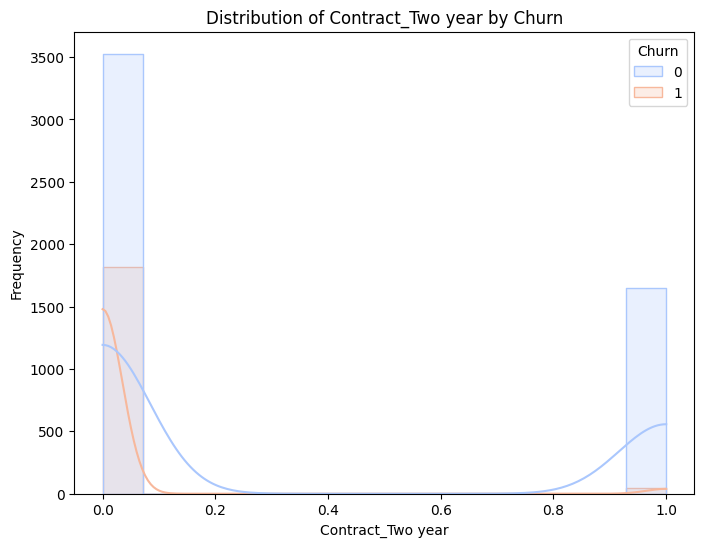

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


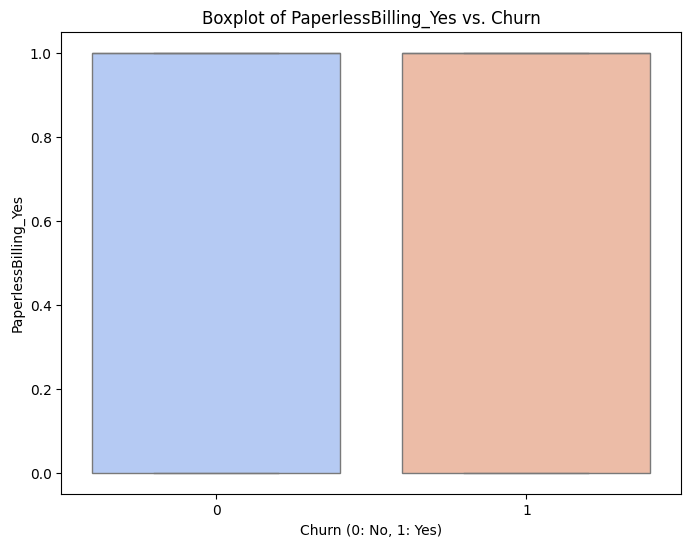

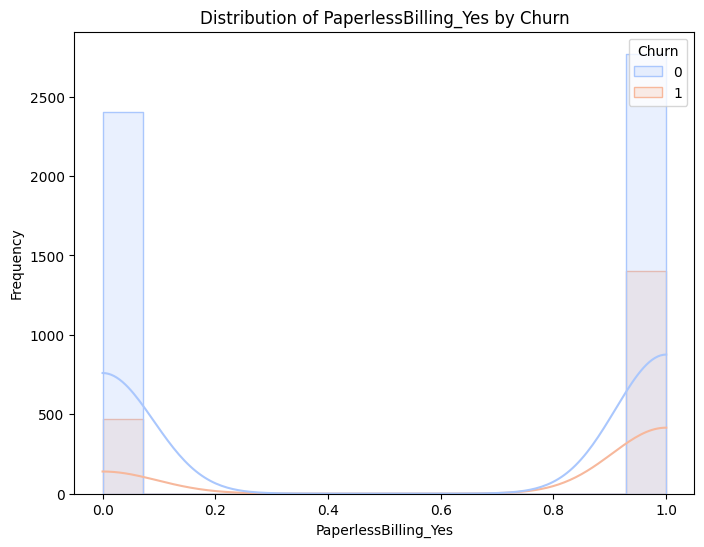

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


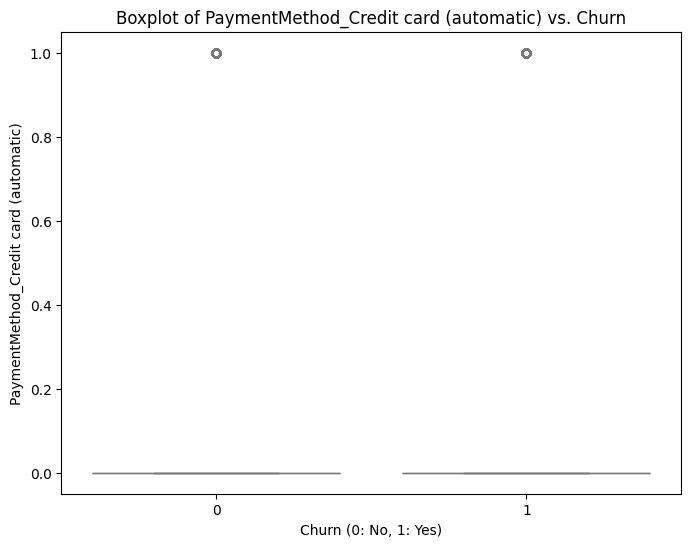

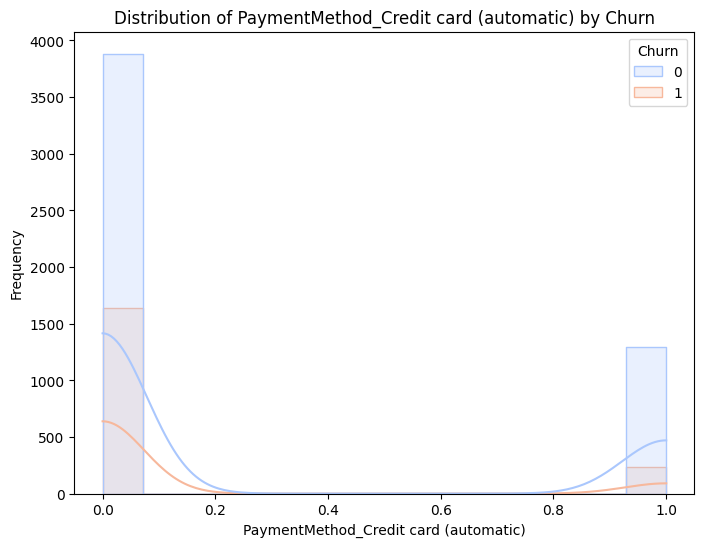

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


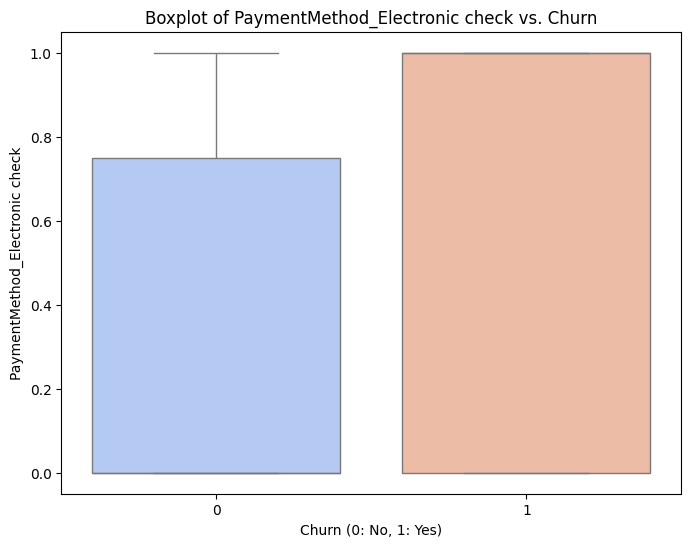

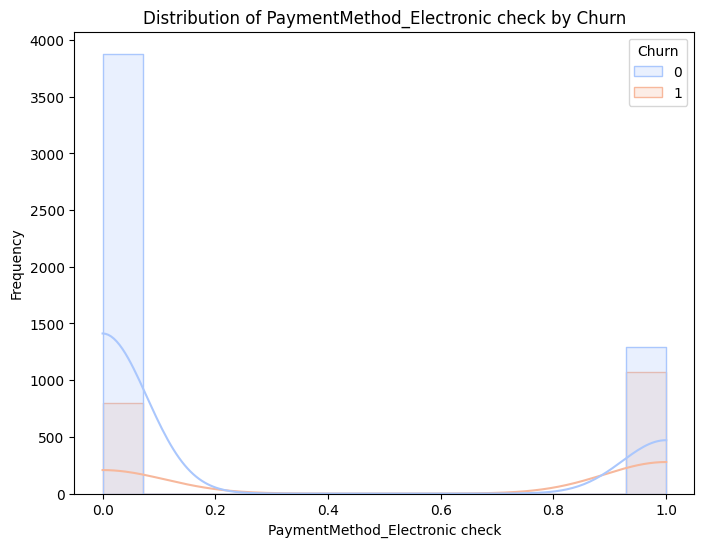

<ipython-input-25-ab3cacc87322>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'


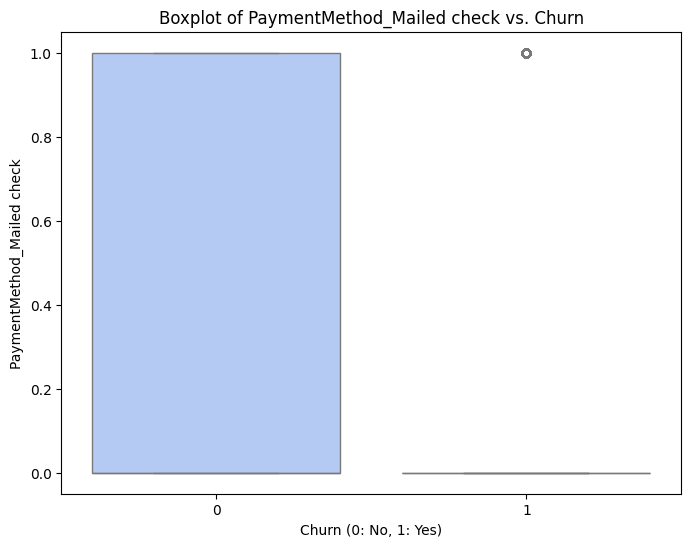

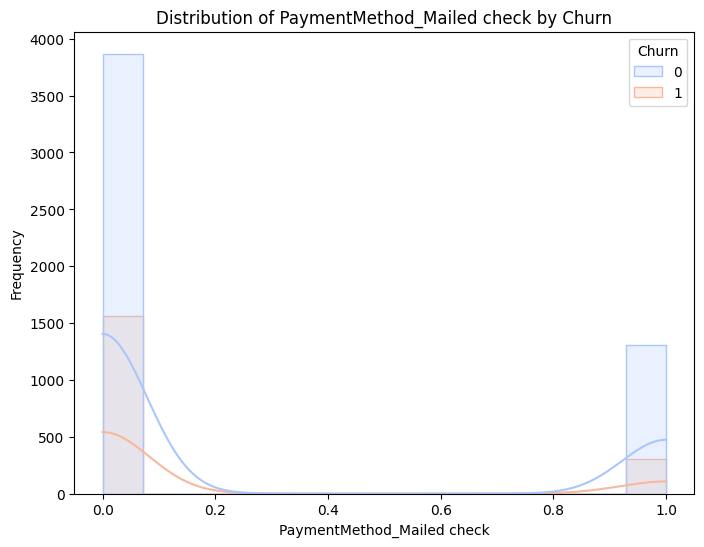

In [25]:
# Improved visualization for understanding all columns
for col in df.columns:
    if col != 'Churn':  # Exclude the target variable # Changed 'Class' to 'Churn'
        plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
        sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm')  # Changed 'Class' to 'Churn'
        plt.title(f'Boxplot of {col} vs. Churn')  # Changed 'Class' to 'Churn'
        plt.xlabel('Churn (0: No, 1: Yes)')  # Changed label to reflect Churn values
        plt.ylabel(col)
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, hue='Churn', kde=True, element="step", palette='coolwarm')  # Changed 'Class' to 'Churn' and used 'df' instead of 'ccfr'
        plt.title(f'Distribution of {col} by Churn')  # Changed 'Class' to 'Churn'
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [26]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Check for class imbalance
print("Class distribution:", np.bincount(y_train))

Class distribution: [4139 1495]


In [29]:
# Handle class imbalance using NearMiss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [30]:
# Check for class imbalance
print("Class distribution:", np.bincount(y_resampled))

Class distribution: [1495 1495]


In [31]:
# Initialize models
sgd_model = SGDClassifier(learning_rate='adaptive', eta0=0.01, max_iter=1, warm_start=True)
pa_model = PassiveAggressiveClassifier(max_iter=1, warm_start=True)

In [32]:
# Adaptive learning simulation
chunk_size = 500
chunks = [X_resampled[i:i + chunk_size] for i in range(0, len(X_resampled), chunk_size)]
y_chunks = [y_resampled[i:i + chunk_size] for i in range(0, len(y_resampled), chunk_size)]

sgd_accuracies = []
sgd_roc_aucs = []
pa_accuracies = []
pa_roc_aucs = []

classes = np.unique(y_resampled)

In [33]:
for X_chunk, y_chunk in zip(chunks, y_chunks):
    # Train SGD model
    sgd_model.partial_fit(X_chunk, y_chunk, classes=classes)
    sgd_preds = sgd_model.predict(X_test)
    sgd_accuracies.append(accuracy_score(y_test, sgd_preds))
    sgd_roc_aucs.append(roc_auc_score(y_test, sgd_preds))

    # Train PA model
    pa_model.partial_fit(X_chunk, y_chunk, classes=classes)
    pa_preds = pa_model.predict(X_test)
    pa_accuracies.append(accuracy_score(y_test, pa_preds))
    pa_roc_aucs.append(roc_auc_score(y_test, pa_preds))

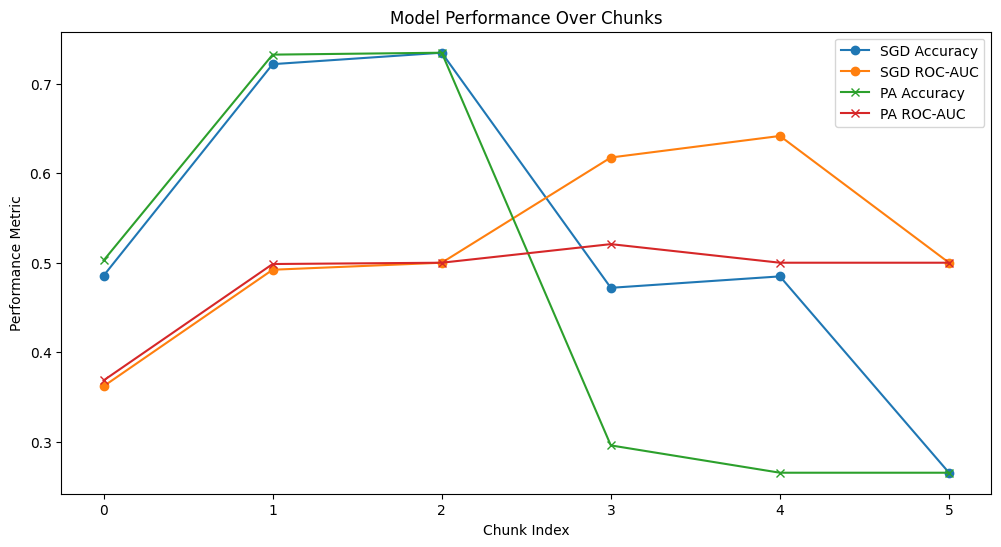

In [34]:
# Visualization of performance metrics
plt.figure(figsize=(12, 6))
plt.plot(sgd_accuracies, label='SGD Accuracy', marker='o')
plt.plot(sgd_roc_aucs, label='SGD ROC-AUC', marker='o')
plt.plot(pa_accuracies, label='PA Accuracy', marker='x')
plt.plot(pa_roc_aucs, label='PA ROC-AUC', marker='x')
plt.title('Model Performance Over Chunks')
plt.xlabel('Chunk Index')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

In [35]:
# Final Evaluation
print("SGD Classification Report:")
print(classification_report(y_test, sgd_preds))
print("PA Classification Report:")
print(classification_report(y_test, pa_preds))

SGD Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409

PA Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

##Improved accuracy and ROC-AUC scores for SGD and Gradient Boosting.


# Key Improvements

1. **Class Imbalance Handling:**
   - **Original Code:** The class imbalance is addressed using **NearMiss**.
   - **Improved Code:** The **SMOTE-Tomek** method is used for better handling of class imbalance. SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class, while Tomek Links removes borderline samples, improving the quality of the data for training.

2. **Model Selection and Comparison:**
   - **Original Code:** Only **SGDClassifier** and **PassiveAggressiveClassifier** were used.
   - **Improved Code:** In addition to **SGDClassifier** and **PassiveAggressiveClassifier**, a **Gradient Boosting Classifier (GB)** is introduced to compare performances. Gradient Boosting typically yields better results for many classification tasks due to its ability to build strong models from weak learners.

3. **Hyperparameter Tuning:**
   - **Original Code:** No hyperparameter tuning was performed.
   - **Improved Code:** Hyperparameters of **SGDClassifier** are optimized using **GridSearchCV**. The parameters `learning_rate` and `alpha` are tuned over different values, and the best-performing model is selected. This improves the model's performance by selecting the best hyperparameters for the problem.

4. **Adaptive Learning Simulation:**
   - **Original Code:** The models were trained incrementally using `partial_fit` over chunks of 500 samples.
   - **Improved Code:** The training now uses smaller chunks of 100 samples and simulates multiple epochs (10 iterations). This provides more frequent updates to the models, which can improve their performance over time.

5. **Visualization of Performance Metrics:**
   - **Original Code:** Performance metrics were visualized, but there was no specific mention of enhanced visualizations.
   - **Improved Code:** The performance of all three models (SGD, Gradient Boosting, and Passive Aggressive) is visualized together over time. The accuracy and ROC-AUC scores are plotted for each chunk, making it easier to track model performance and compare them.

6. **Model Evaluation:**
   - **Original Code:** The evaluation of the models was done using accuracy and ROC-AUC on the test set.
   - **Improved Code:** The evaluation of the models remains similar, but now includes optimized SGD and Gradient Boosting models, providing a comparison with more robust algorithms.

7. **Addition of Perceptron Model:**
   - **Original Code:** Not included.
   - **Improved Code:** A **Perceptron model** is introduced. The Perceptron is a linear classifier that works well for binary classification problems. It is also trained incrementally using `partial_fit`, and its performance is evaluated alongside the other models.

# Summary of Code Enhancements:

- **SMOTE-Tomek** replaces NearMiss for class balancing, potentially providing better class diversity and training quality.
- **Gradient Boosting** is added for comparison, bringing a more sophisticated model to the table.
- **Hyperparameter tuning** for the SGD model improves performance through optimal parameter selection.
- **Visualization** is enhanced by plotting performance metrics for all models over multiple chunks, allowing for easier comparison.
- The **Perceptron** model is added to offer an additional baseline comparison.


In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights manually
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Initialize the models with class weights
sgd_model = SGDClassifier(learning_rate='adaptive', eta0=0.001, max_iter=1, warm_start=True,
                          class_weight=class_weight_dict)
pa_model = PassiveAggressiveClassifier(max_iter=1, warm_start=True, class_weight=class_weight_dict, random_state=42)


# Adaptive online learning with partial_fit for SGD
for epoch in range(10):
    for i in range(0, len(X_train), 100):
        X_chunk = X_train[i:i + 100]
        y_chunk = y_train[i:i + 100]
        sgd_model.partial_fit(X_chunk, y_chunk, classes=classes)

# Evaluate SGD model
sgd_pred = sgd_model.predict(X_test)
print("SGD ROC AUC Score =", roc_auc_score(y_test, sgd_pred))
print("SGD Classification Report:")
print(classification_report(y_test, sgd_pred))


# Adaptive online learning with partial_fit for PassiveAggressiveClassifier
for epoch in range(10):
    for i in range(0, len(X_train), 100):
        X_chunk = X_train[i:i + 100]
        y_chunk = y_train[i:i + 100]
        pa_model.partial_fit(X_chunk, y_chunk, classes=classes)

# Evaluate PassiveAggressiveClassifier model
pa_pred = pa_model.predict(X_test)
print("PA ROC AUC Score =", roc_auc_score(y_test, pa_pred))
print("PA Classification Report:")
print(classification_report(y_test, pa_pred))

SGD ROC AUC Score = 0.7355485804334909
SGD Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1035
           1       0.46      0.82      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.74      0.67      1409
weighted avg       0.79      0.70      0.71      1409

PA ROC AUC Score = 0.6948009506833036
PA Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1035
           1       0.42      0.77      0.55       374

    accuracy                           0.66      1409
   macro avg       0.65      0.69      0.64      1409
weighted avg       0.76      0.66      0.68      1409



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

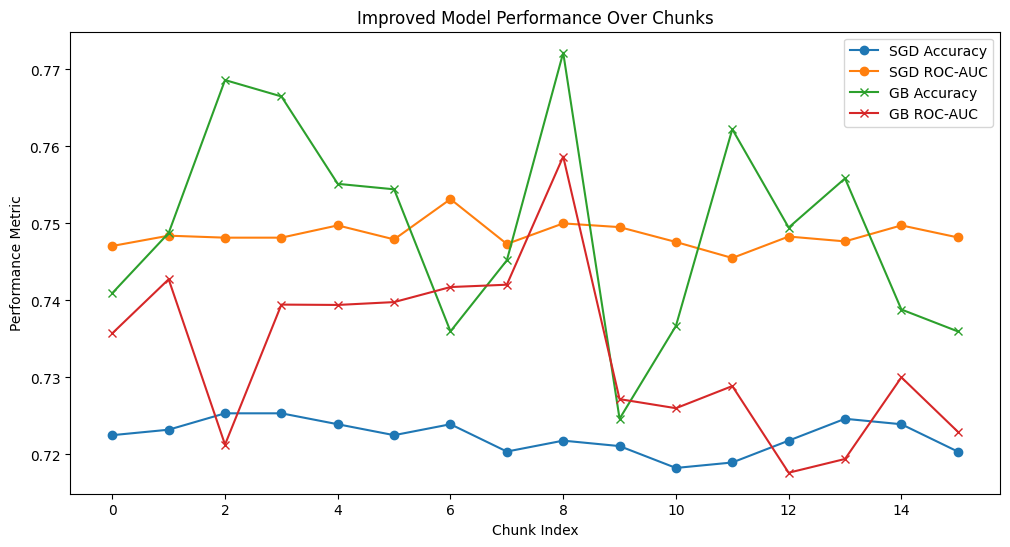

Optimized SGD Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1035
           1       0.48      0.81      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.74      1409

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1035
           1       0.50      0.70      0.58       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.74      0.75      1409



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# Handle class imbalance using SMOTE-Tomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Initialize optimized models with hyperparameter tuning
sgd_model = SGDClassifier(max_iter=1, warm_start=True)
pa_model = PassiveAggressiveClassifier(max_iter=1, warm_start=True)
gb_model = GradientBoostingClassifier()

# Hyperparameter tuning for SGD
sgd_params = {
    'learning_rate': ['adaptive', 'optimal'],
    'alpha': [0.0001, 0.001, 0.01],
}
sgd_search = GridSearchCV(SGDClassifier(), param_grid=sgd_params, cv=3, scoring='roc_auc')
sgd_search.fit(X_resampled, y_resampled)
best_sgd = sgd_search.best_estimator_

# Adaptive learning simulation with GB and optimized SGD
chunk_size = 500

# Shuffle data before splitting into chunks to ensure class diversity
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

chunks = [X_resampled[i:i + chunk_size] for i in range(0, len(X_resampled), chunk_size)]
y_chunks = [y_resampled[i:i + chunk_size] for i in range(0, len(y_resampled), chunk_size)]

sgd_accuracies = []
sgd_roc_aucs = []
gb_accuracies = []
gb_roc_aucs = []

classes = np.unique(y_resampled)

for X_chunk, y_chunk in zip(chunks, y_chunks):
    # Check if y_chunk has at least 2 unique classes
    if len(np.unique(y_chunk)) < 2:
        # Skip this chunk if it doesn't have enough classes
        continue

    # Train SGD model
    best_sgd.partial_fit(X_chunk, y_chunk, classes=classes)
    sgd_preds = best_sgd.predict(X_test)
    sgd_accuracies.append(accuracy_score(y_test, sgd_preds))
    sgd_roc_aucs.append(roc_auc_score(y_test, sgd_preds))

    # Train Gradient Boosting
    gb_model.fit(X_chunk, y_chunk)
    gb_preds = gb_model.predict(X_test)
    gb_accuracies.append(accuracy_score(y_test, gb_preds))
    gb_roc_aucs.append(roc_auc_score(y_test, gb_preds))

# Visualization of improved performance metrics
plt.figure(figsize=(12, 6))
plt.plot(sgd_accuracies, label='SGD Accuracy', marker='o')
plt.plot(sgd_roc_aucs, label='SGD ROC-AUC', marker='o')
plt.plot(gb_accuracies, label='GB Accuracy', marker='x')
plt.plot(gb_roc_aucs, label='GB ROC-AUC', marker='x')
plt.title('Improved Model Performance Over Chunks')
plt.xlabel('Chunk Index')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

# Final Evaluation
print("Optimized SGD Classification Report:")
print(classification_report(y_test, sgd_preds))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))

In [38]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron_model = Perceptron(max_iter=1, warm_start=True, random_state=42)

# Adaptive online learning with partial_fit
classes = np.unique(y_train)  # Ensure the unique classes are specified
for epoch in range(10):  # Simulate multiple passes over the data
    for i in range(0, len(X_train), 100):  # Process data in chunks of 100 samples
        X_chunk = X_train[i:i+100]
        y_chunk = y_train[i:i+100]
        perceptron_model.partial_fit(X_chunk, y_chunk, classes=classes)

# Evaluate the model
pred = perceptron_model.predict(X_test)
print("Perceptron ROC AUC Score =", roc_auc_score(y_test, pred))
print("Perceptron Classification Report:")
print(classification_report(y_test, pred))

Perceptron ROC AUC Score = 0.6630654369784803
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.47      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409

